# Topics covered in this notebook
## 1. Data Explorations
## 2. Preprocessing
## 3. Model Fitting
## 4. Model Diagnosis
## 5. Model improvement
## 6. Model Improvement Summary
## 7. Best Model Report - Model 2
## 8. Summary

# The Boston house prices dataset

In [1]:
# Prepare the dataset
from sklearn import datasets

data = datasets.load_boston()

In [2]:
# See the default description in the dataset
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
import numpy as np
import pandas as pd

# Define features
df = pd.DataFrame(data.data, columns=data.feature_names)

# Define targets
target = pd.DataFrame(data.target, columns=["MEDV"])

In [4]:
# Features
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Targets
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
target.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


# 1. Data Explorations
- **1.1 Box-plot**
- **1.2 Pairwise scatterplots**
- **1.3 Correlation Matrix**

## 1.1 Box-plot
- **Purpose: For outlier & density distribution visualizations**

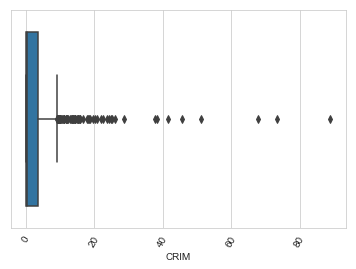

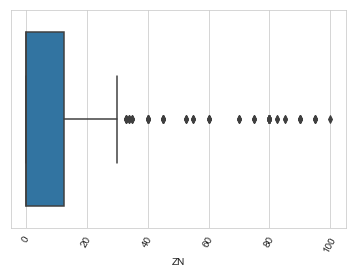

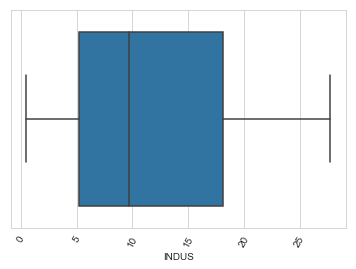

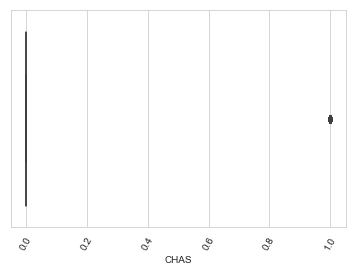

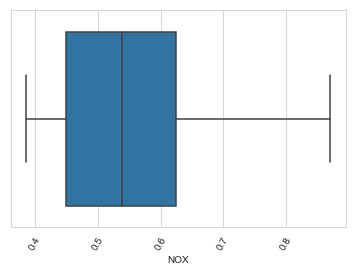

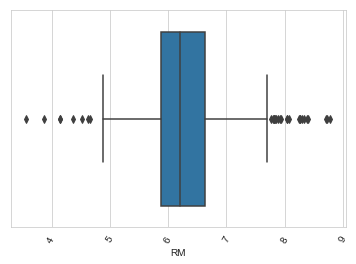

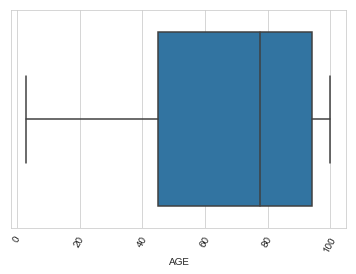

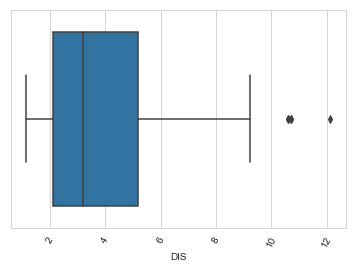

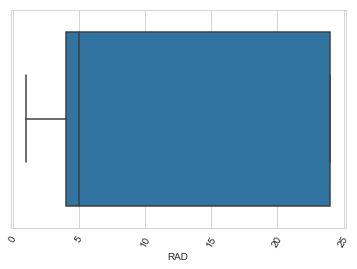

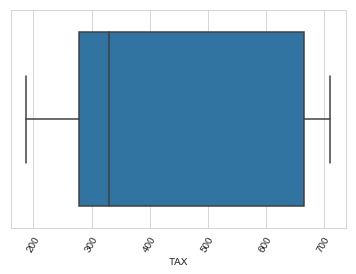

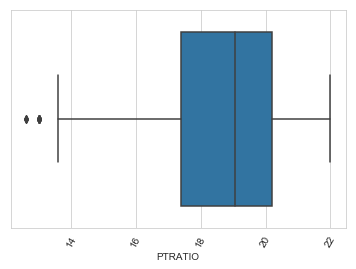

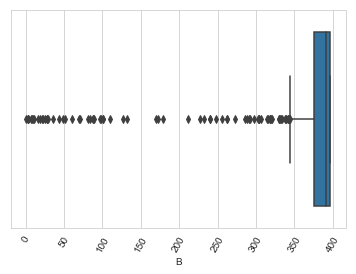

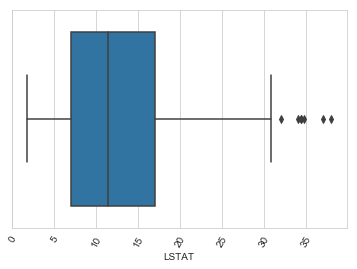

In [9]:
# Some independent variables have skew distributions and many outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

def box_viz(df):
    ax = sns.boxplot(df)
    plt.xticks(rotation=60)
    plt.show()

for col in df:
    box_viz(df = df[col])

## 1.2 Pairwise scatterplots
- **Purpose: For inspecting the pairwise relationships between features**

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


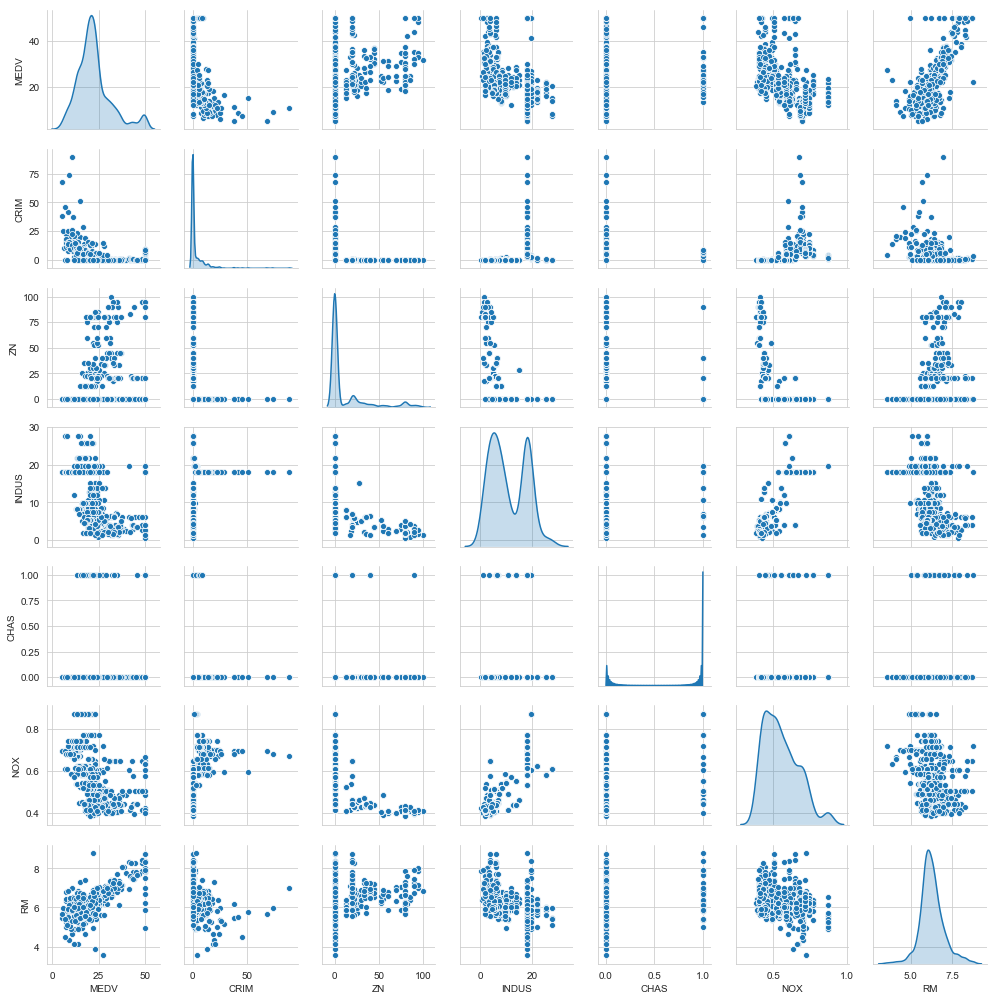

In [10]:
# RM has a positive relationship with MEDV
def splom_viz(df, labels=None):
    ax = sns.pairplot(df, hue=labels, diag_kind='kde', size=2)
    plt.show()
    
df['MEDV'] = target
splom_viz(df = df[['MEDV', 
                   'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM']])

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


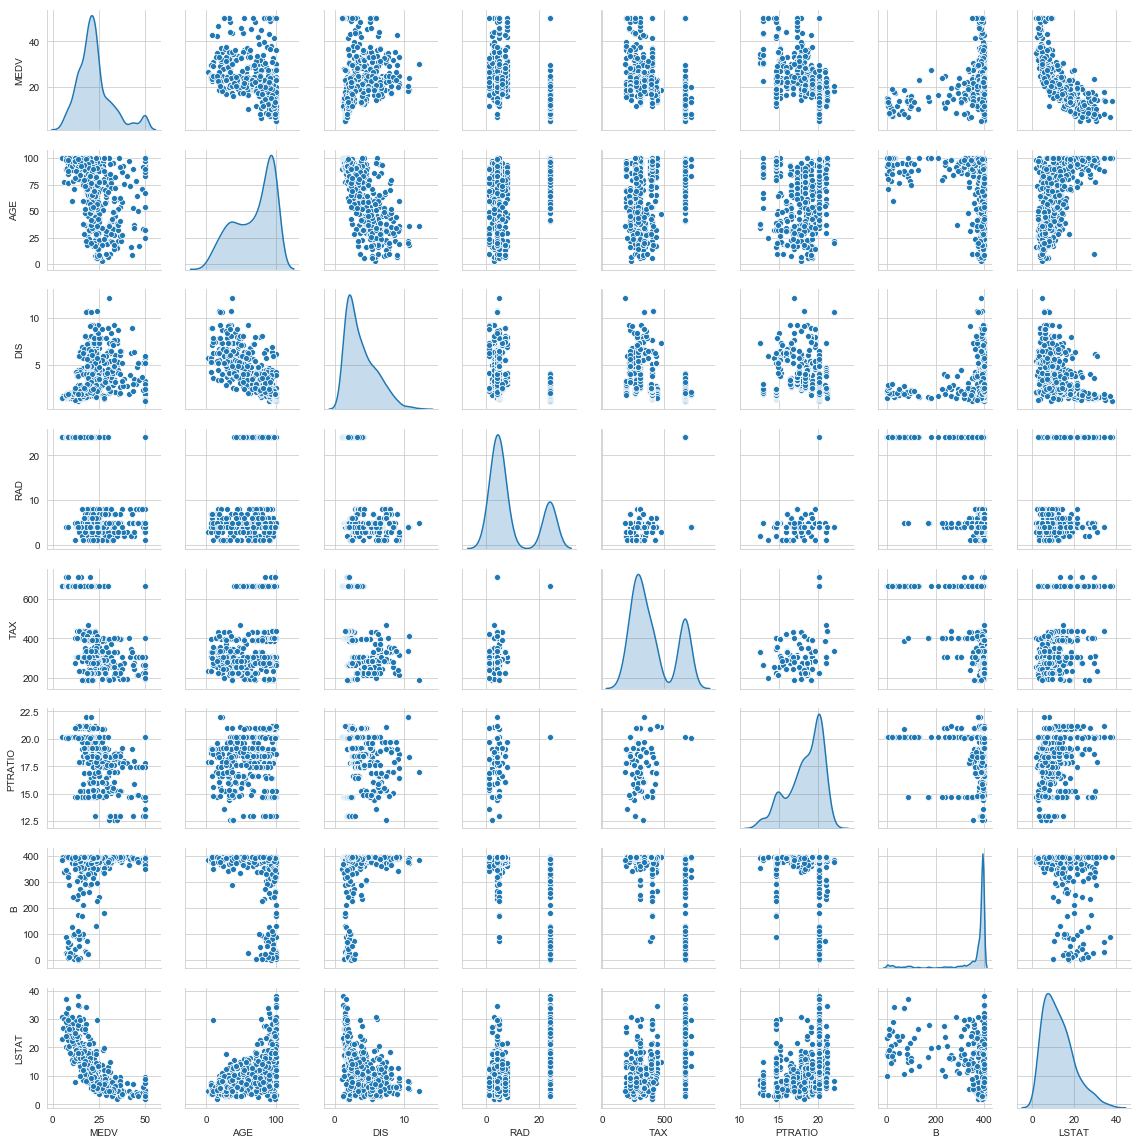

In [11]:
# LSTAT has a positive relationship (non-linear) with MEDV
splom_viz(df = df[['MEDV',
                   'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']])

## 1.3 Correlation Matrix
- **Purpose: For quantifying the relationships between features**

In [12]:
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

In [13]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


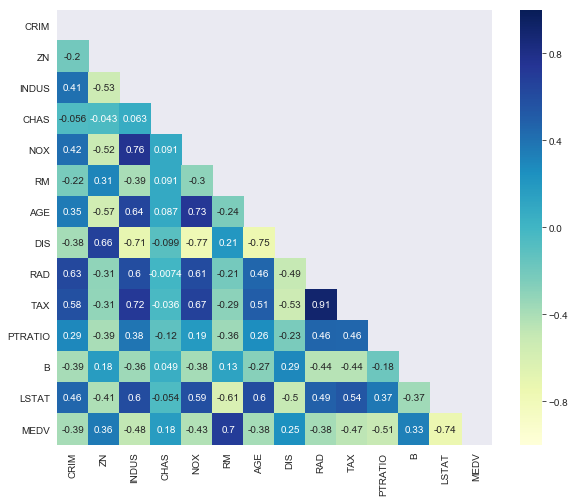

In [14]:
import seaborn as sb

with sb.axes_style("darkgrid"):
    fig = plt.figure(figsize=(10,8))
    ax = sb.heatmap(correlation_matrix, mask = mask, 
                    vmin = -1, vmax = 1, square = True,
                    annot = True, cmap = "YlGnBu")

# 2. Preprocessing

- **2.1 Standardization**
- **2.2 Train (80%) & Test (20%) data splitting**

## 2.1 Standardization
- **Notice**
    - Standardizing features is important in a multiple linear regression if we want to compare coefficients for different predictors within a model. 
    - For comparing coefficients for the same predictors across different data sets, don’t standardize.

## 2.2 Train (80%) & Test (20%) data splitting

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df[df.columns[0:-1]])
standardized_data = pd.DataFrame(standardized_data, columns=data.feature_names)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(standardized_data, df.MEDV, 
                                                    test_size=0.2, random_state=0) 

In [16]:
standardized_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [17]:
# After the standardization, the mean must be 0 and the std must be 1
standardized_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-8.513173e-17,3.306534e-16,2.804081e-16,-3.100287e-16,-8.071058e-16,-5.189086e-17,-2.650493e-16,8.293761e-17,1.514379e-15,-9.934960e-16,4.493551e-16,-1.451408e-16,-1.595123e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00


In [18]:
# Check the splitting is correct!
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


# 3. Model Fitting 
- **3.1 Using Sklearn**
- **3.2 Using Matrix Close Estimation**
- **3.3 Using statsmodels**

## 3.1 Using Sklearn

In [19]:
# Model 1
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Initiate a linear regression model
model_1=linear_model.LinearRegression()

# Fit the model on train data
model_1.fit(x_train, y_train)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# Results on test data
r_squared = model_1.score(x_test, y_test)
predictions = model_1.predict(x_test)
model_1_mse = mean_squared_error(y_true = y_test, y_pred = predictions)

print('Intercept (B0) is {}.'.format(round(model_1.intercept_, 4)))
for i in range(len(df.columns[0:-1])):
    print('{} coefficient is {}.'.format(df.columns[i], round(model_1.coef_.flatten()[i], 4)))
print()
print('R-squared is {}.'.format(round(r_squared, 4)))
print('MSE is {}.'.format(round(model_1_mse, 4)))

Intercept (B0) is 22.4804.
CRIM coefficient is -1.0264.
ZN coefficient is 1.0433.
INDUS coefficient is 0.0376.
CHAS coefficient is 0.594.
NOX coefficient is -1.8665.
RM coefficient is 2.6032.
AGE coefficient is -0.0878.
DIS coefficient is -2.9165.
RAD coefficient is 2.124.
TAX coefficient is -1.8503.
PTRATIO coefficient is -2.2621.
B coefficient is 0.7397.
LSTAT coefficient is -3.5156.

R-squared is 0.5892.
MSE is 33.449.


## 3.2 Using Matrix Close Estimation

$$ \hat{B} = (X^TX)^{-1}X^TY$$

In [21]:
# Another way to estimate coefficient: Matrix estimation
from numpy.linalg import inv
def matrix_estimate(x, y):
    ones_array =  np.ones(shape=len(y))[..., None]
    x = np.concatenate((ones_array, x), 1)
    
    #betas = inv(x.transpose().dot(x)).dot(x.transpose()).dot(y)
    
    betas = np.dot(np.dot(inv(np.dot(x.transpose(), x)), x.transpose()), y)
    return betas

In [22]:
matrix_estimation = matrix_estimate(x = x_train, y = y_train)

In [23]:
print('Intercept (B0) is {}.'.format(round(model_1.intercept_, 4)))
print('Intercept (B0) is {} using matrix estimation.'.format(round(matrix_estimation[0], 4)))
print()
for i in range(len(df.columns[0:-1])):
    print('{} coefficient is {}.'.format(df.columns[i], 
                                         round(model_1.coef_.flatten()[i], 4)))
    print('{} coefficient is {} using matrix estimation.'.format(df.columns[i]
    , round(matrix_estimation[i+1], 4)))
    print()

Intercept (B0) is 22.4804.
Intercept (B0) is 22.4804 using matrix estimation.

CRIM coefficient is -1.0264.
CRIM coefficient is -1.0264 using matrix estimation.

ZN coefficient is 1.0433.
ZN coefficient is 1.0433 using matrix estimation.

INDUS coefficient is 0.0376.
INDUS coefficient is 0.0376 using matrix estimation.

CHAS coefficient is 0.594.
CHAS coefficient is 0.594 using matrix estimation.

NOX coefficient is -1.8665.
NOX coefficient is -1.8665 using matrix estimation.

RM coefficient is 2.6032.
RM coefficient is 2.6032 using matrix estimation.

AGE coefficient is -0.0878.
AGE coefficient is -0.0878 using matrix estimation.

DIS coefficient is -2.9165.
DIS coefficient is -2.9165 using matrix estimation.

RAD coefficient is 2.124.
RAD coefficient is 2.124 using matrix estimation.

TAX coefficient is -1.8503.
TAX coefficient is -1.8503 using matrix estimation.

PTRATIO coefficient is -2.2621.
PTRATIO coefficient is -2.2621 using matrix estimation.

B coefficient is 0.7397.
B coeff

## 3.3 Using statsmodels

In [24]:
# Use statsmodels to fit the model again
import statsmodels.api as sm

# Notice: add a coefficient for the constant (Beta 0)
x_train = sm.add_constant(x_train) 

# Fit the model on train data
model_1 = sm.OLS(y_train, x_train).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     102.2
Date:                Sat, 17 Nov 2018   Prob (F-statistic):          9.64e-117
Time:                        14:44:12   Log-Likelihood:                -1171.5
No. Observations:                 404   AIC:                             2371.
Df Residuals:                     390   BIC:                             2427.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4804      0.224    100.452      0.000      22.040      22.920
CRIM          -1.0264      0.315     -3.257      0.001      -1.646      -0.407
ZN             1.0433      0.336      3.102      0.002       0.382       1.705
INDUS          0.0376      0.435      0.087      0.931      -0.817       0.892
CHAS           0.5940      0.229      2.595      0.010       0.144       1.044
NOX           -1.8665      0.488     -3.828      0.000      -2.825      -0.908
RM             2.6032      0.321      8.106      0.000       1.972       3.235
AGE           -0.0878      0.403     -0.218      0.828      -0.880       0.704
DIS           -2.9165      0.450     -6.480      0.000      -3.801      -2.032
RAD            2.1240      0.610      3.481      0.001       0.924       3.324
TAX           -1.8503      0.656     -2.819      0.005      -3.141      -0.560
PTRATIO       -2.2621      0.296     -7.636      0.000      -2.845      -1.680
B              0.7397      0.269      2.749      0.006       0.211       1.269
LSTAT         -3.5156      0.387     -9.086      0.000      -4.276      -2.755
==============================================================================
Omnibus:                      141.494   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              629.882
Skew:                           1.470   Prob(JB):                    1.67e-137
Kurtosis:                       8.365   Cond. No.                         9.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Coefficient estimations & results are the same as using sklearn
predictions = model_1.predict(sm.add_constant(x_test))
r_squared = r2_score(y_true=y_test, y_pred=predictions)
model_1_test_mse = mean_squared_error(y_true=y_test, y_pred=predictions)
model_1_train_mse = mean_squared_error(y_true=y_train, y_pred=model_1.fittedvalues)

for i in range(len(model_1.params)):
    print('{} coefficient is {}.'.format(model_1.params.index[i], 
                                         round(model_1.params[i], 4)))
print()
print('Model 1 R-squared (on test data) is {}.'.format(round(r_squared, 4)))
print('Model 1 MSE (on test data) is {}.'.format(round(model_1_test_mse, 4)))
print('Model 1 MSE (on train data) is {}.'.format(round(model_1_train_mse, 4)))

const coefficient is 22.4804.
CRIM coefficient is -1.0264.
ZN coefficient is 1.0433.
INDUS coefficient is 0.0376.
CHAS coefficient is 0.594.
NOX coefficient is -1.8665.
RM coefficient is 2.6032.
AGE coefficient is -0.0878.
DIS coefficient is -2.9165.
RAD coefficient is 2.124.
TAX coefficient is -1.8503.
PTRATIO coefficient is -2.2621.
B coefficient is 0.7397.
LSTAT coefficient is -3.5156.

Model 1 R-squared (on test data) is 0.5892.
Model 1 MSE (on test data) is 33.449.
Model 1 MSE (on train data) is 19.3265.


# 4. Model Diagnosis
- **4.1 Figure I: Residual plot**
- **4.2 Figure II: QQ plot**
- **4.3 Scale-Location Plot**
- **4.4 Cook's Distance**
- **4.5 Others: Figure V**

In [26]:
# Calculations required for later visualizations

# Predictions
model_fitted_y = model_1.fittedvalues

# Residuals
model_residuals = model_1.resid

# Normalized residuals
model_norm_residuals = model_1.get_influence().resid_studentized_internal

# Absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Absolute residuals
model_abs_resid = np.abs(model_residuals)

# Leverage, from statsmodels internals
model_leverage = model_1.get_influence().hat_matrix_diag

# Cook's distance, from statsmodels internals
model_cooks = model_1.get_influence().cooks_distance[0]

## 4.1 Figure I: Residual plot
- **For checking assumption I: Linearity and Additivity**
- **For checking assumption III: Homoscedasticity**
    - We might expect the line to be more horizontal, and the data points scattered more randomly and evenly given different fitted values. 

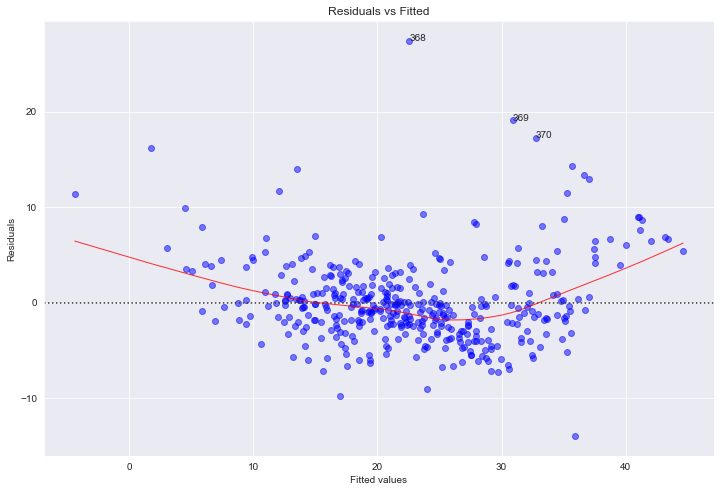

In [27]:
import seaborn as sb
sb.set_style('darkgrid')
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sb.residplot(model_fitted_y, 'MEDV', data=pd.DataFrame(y_train), 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

## 4.2 Figure II: QQ plot
- **For checking assumption IV: Normality**
    - The foundation assumption of a linear regression. QQ plot shows how well the distribution of residuals fit the normal distribution. A good fit should be data points are located on the line.

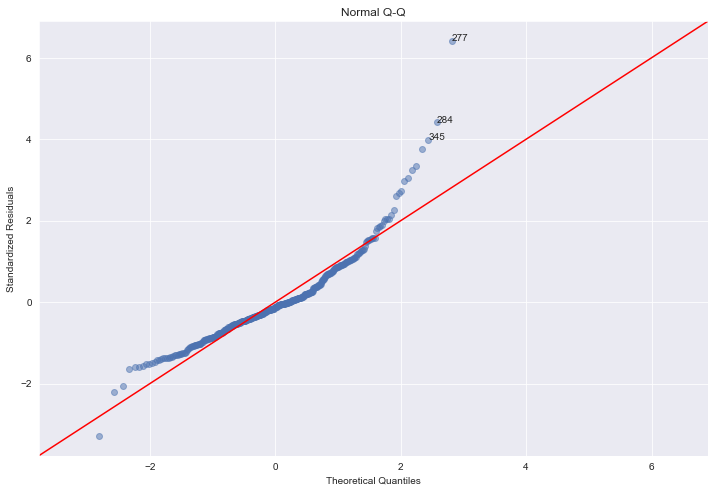

In [28]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

# xy: location of a point
# specify locations of points from the largest to smallest 
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [29]:
# Do the residuals follow a normal distribution?
# Normality assumption testing
from scipy.stats import shapiro

def perform_shapiro_test(data, alpha_threshold):
    '''
    Perform Shapiro-Wilk Test on normality.
    If p value is less than the threshold (alpha_threshold) value, then we reject the H0 (null hypothesis),
    indicating that the data does not follow a normal distribution.
    
    data: sample data
    alpha_threshold: an alpha level to compare with the p-value
    '''
    
    stat, p = shapiro(data)
    
    if p > alpha_threshold:
        print('Sample looks Gaussian (fail to reject H0).')
        print('Test statistic is {}.'.format(round(stat,4)))
        print('The corresponding p-value is {}.'.format(round(p,4)))
    else:
        print('Sample does not look Gaussian (reject H0).')
        print('Test statistic is {}.'.format(round(stat,4)))
        print('The corresponding p-value is {}.'.format(round(p,4)))

perform_shapiro_test(data = model_norm_residuals, alpha_threshold = 0.05)

Sample does not look Gaussian (reject H0).
Test statistic is 0.9053.
The corresponding p-value is 0.0.


## 4.3 Figure III: Scale-Location Plot
- Very similar to the Figure I. The only difference is that the y-axis are square root of standardized residuals.

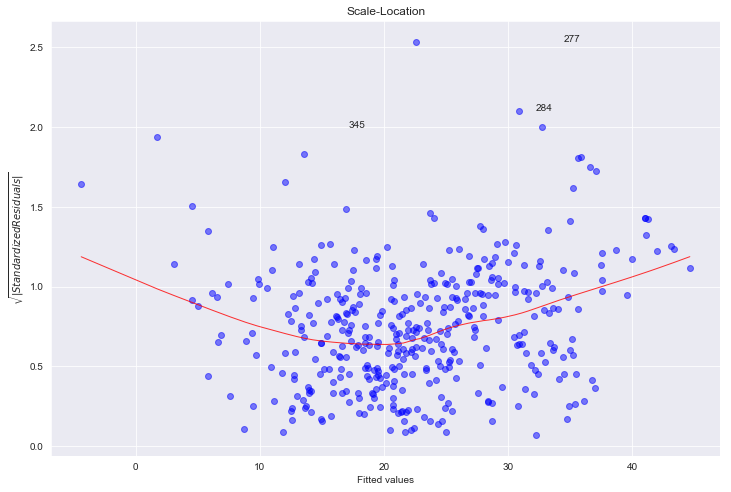

In [30]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5, color = 'blue')
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

## 4.4 Figure IV: Cook's Distance
- Cook's Distance helps us to inspect the influential points.
- **The general rule is data points have cook's distance larger than 0.5 could be considered to be influential.**
    - Reference: https://onlinecourses.science.psu.edu/stat501/node/340/

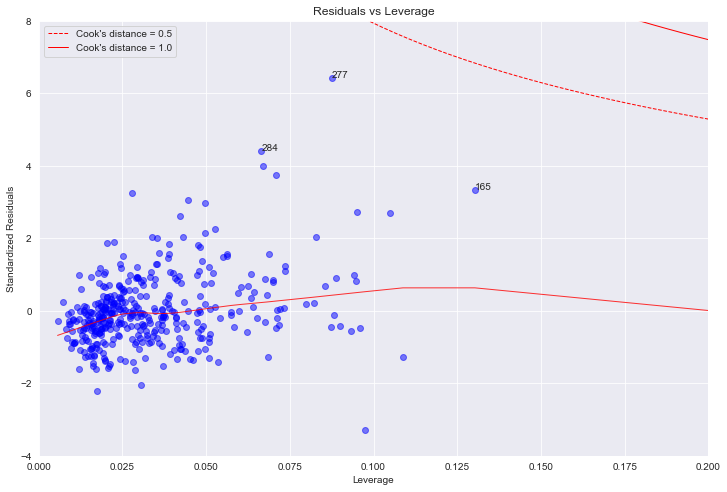

In [31]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5, color = 'blue')
sb.regplot(model_leverage, model_norm_residuals, 
           scatter=False, 
           ci=False, 
           lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, plot_line=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=plot_line, color='red')

p = len(model_1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      "Cook's distance = 0.5", plot_line ='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50),
      "Cook's distance = 1.0", plot_line ='-') # 1 line

plt.legend(loc='upper left')

In [32]:
# The maximum cook distance
max(model_cooks)

0.2822040077345315

## 4.5 Others: Figure V
- **For checking assumption II: Independence**
- The ideal scenario is that residuals should scattered evenly in a certain fixed range. There should not be a (positive/negative) trend line occurred, such that the previous record didn't affect the outcome for the next record.

Text(0.5, 1.0, 'Row number VS Residuals')

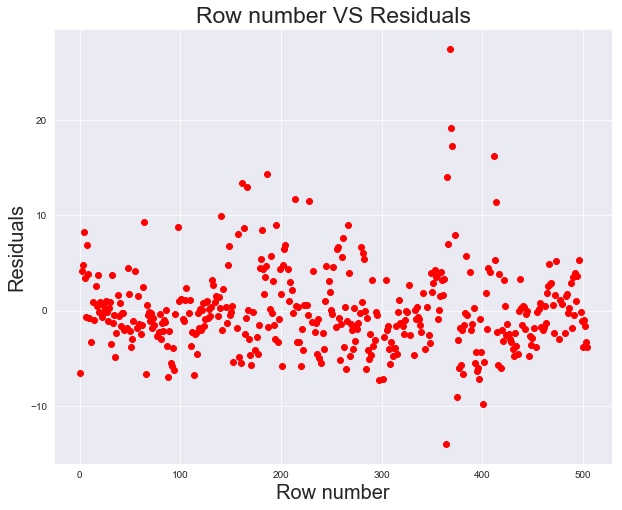

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(x_train.index, model_residuals, c = 'r')
plt.xlabel('Row number', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.title('Row number VS Residuals', fontsize = 23)

# 5. Model improvement
- **5.1 Using box-cox transformation on all independent variables**
- **5.2 Using box-cox transformation on all independent variables and dependent variable**
- **5.3 Outlier imputation (Capping) + Box-cox transformation on all independent variables**
- **5.4 Outlier imputation (Capping) + Box-cox transformation on all independent variables Box-cox transformation on the dependent variable**

## 5.1 Using box-cox transformation on all independent variables

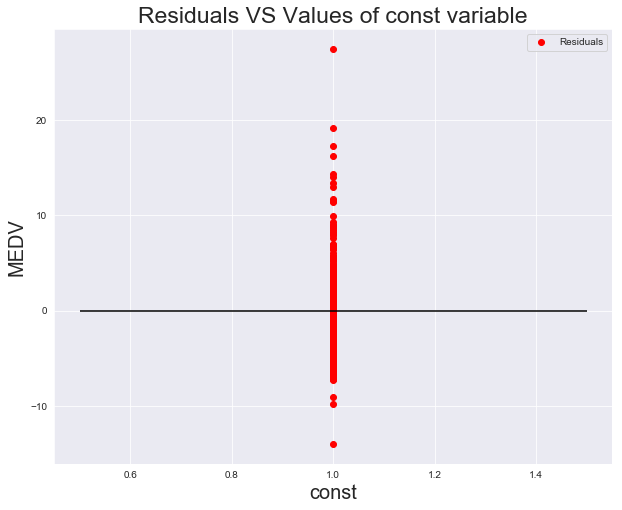

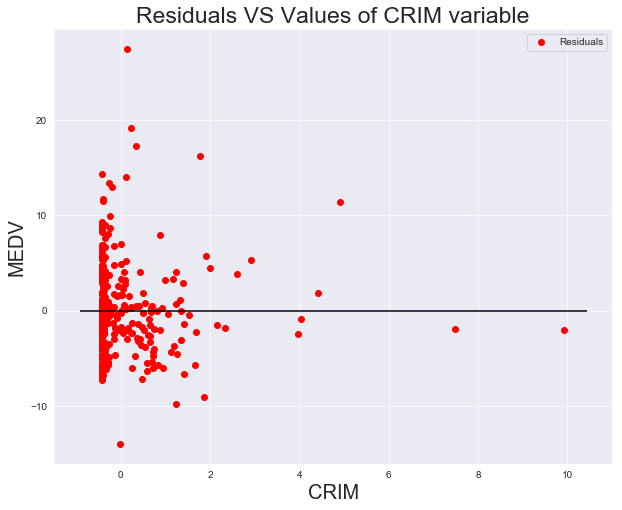

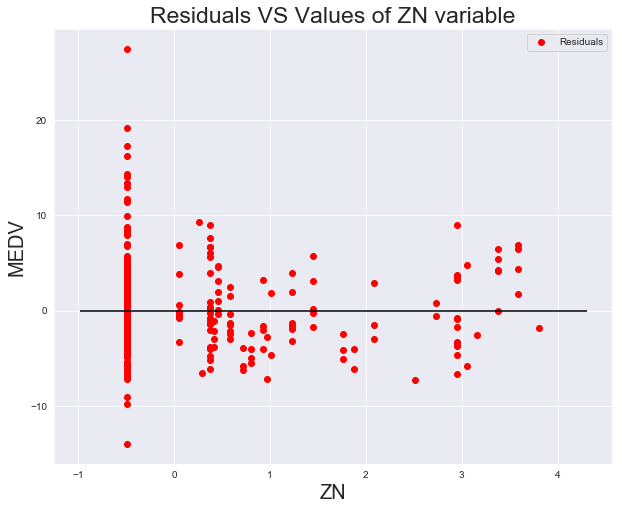

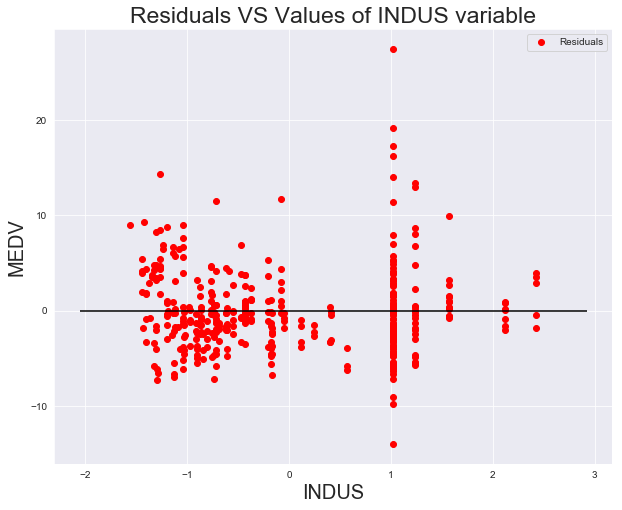

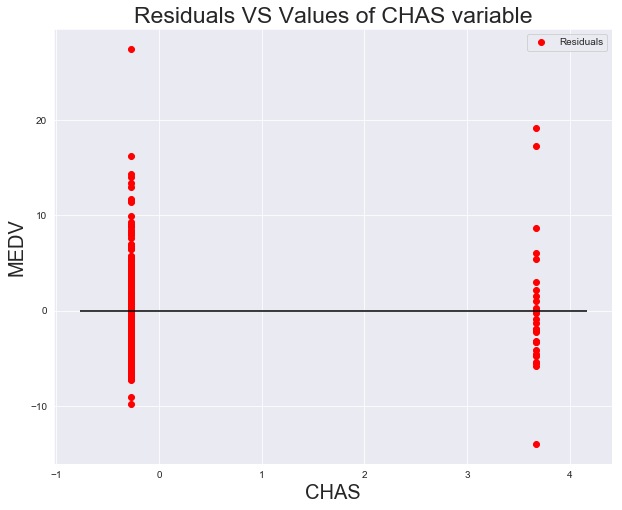

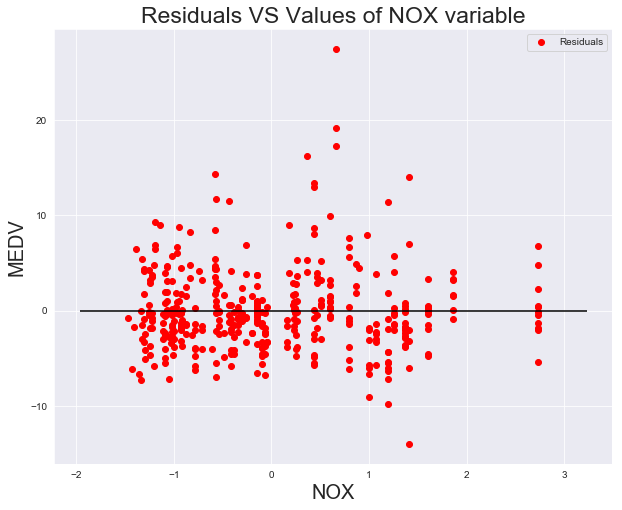

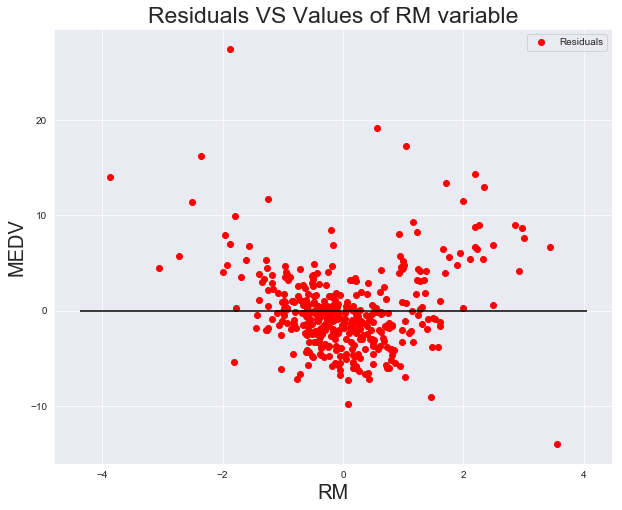

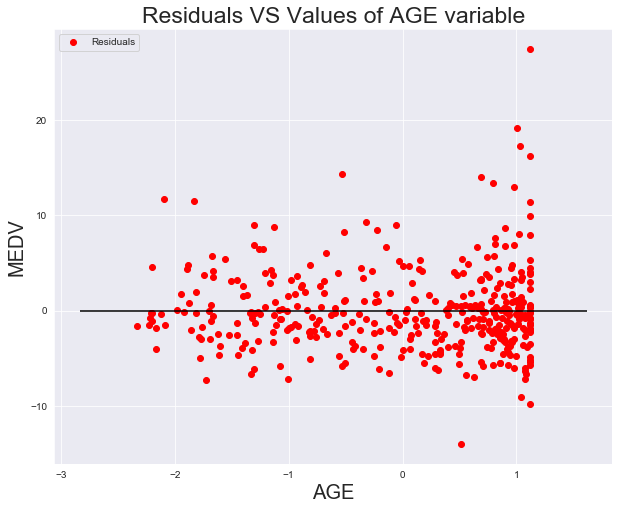

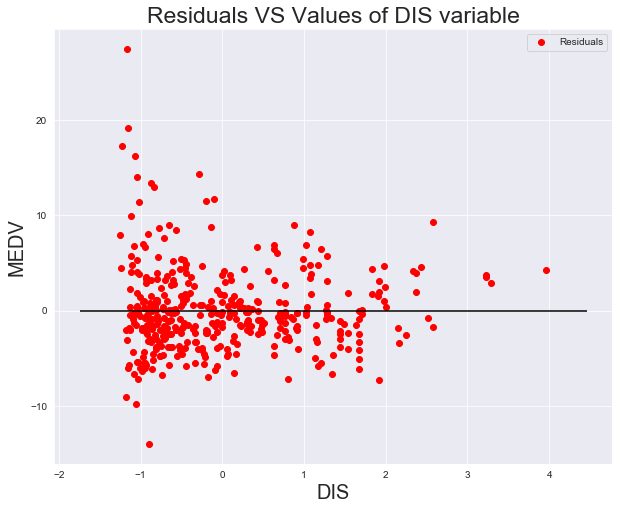

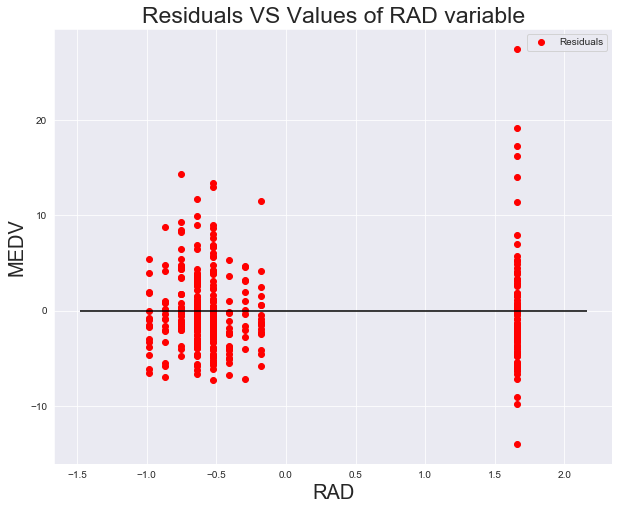

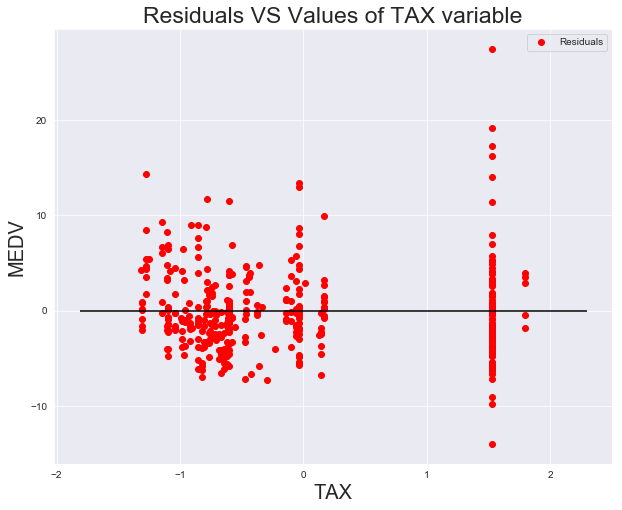

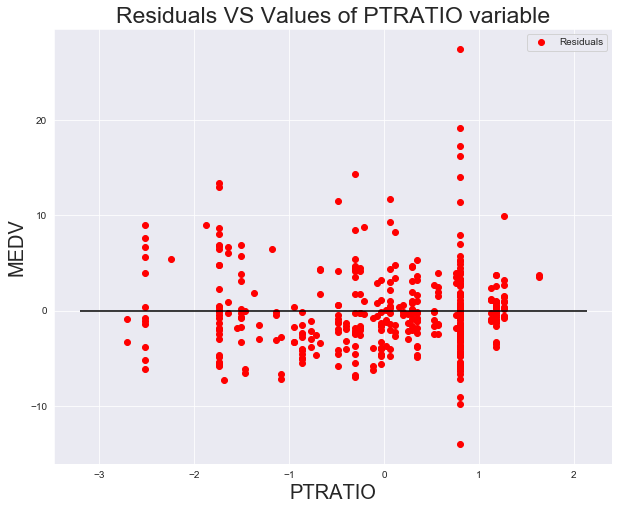

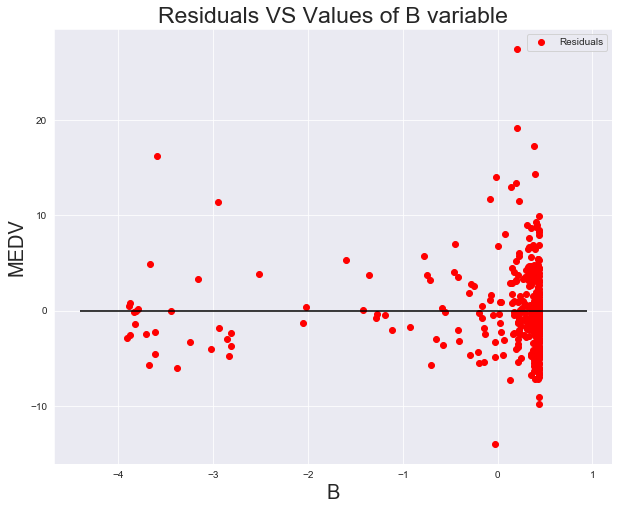

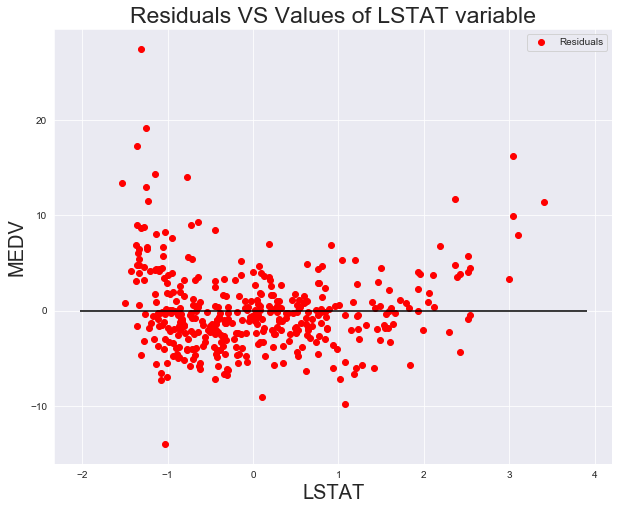

In [34]:
# Plot residuals VS features
for each in x_train.columns:
    plt.figure(figsize=(10,8))
    plt.scatter(x_train[each].values, model_residuals, c = 'r')
    plt.hlines(y = 0, xmin = min(x_train[each].values)-.5, xmax = max(x_train[each].values)+.5)
    plt.xlabel(each, fontsize = 20)
    plt.ylabel('MEDV', fontsize = 20)
    plt.title('Residuals VS Values of {} variable'.format(each), fontsize = 23)
    plt.legend(['Residuals'])

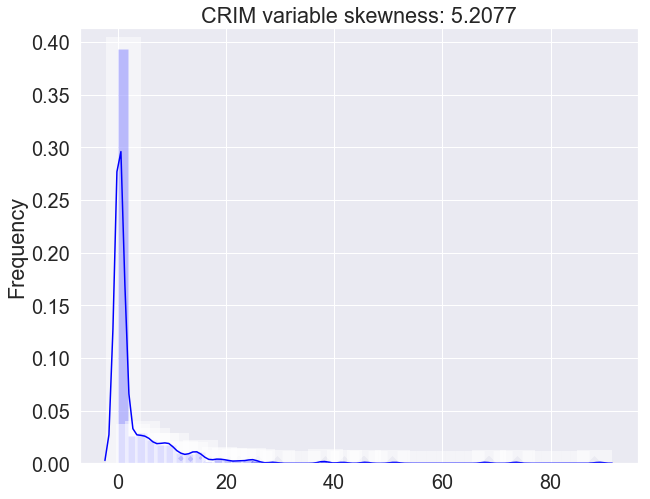

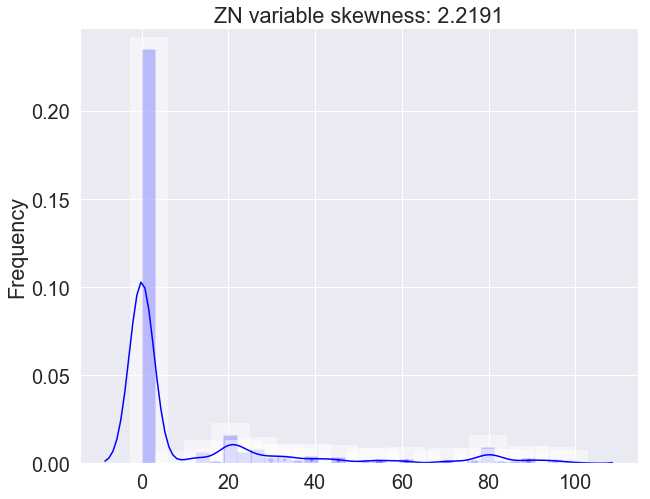

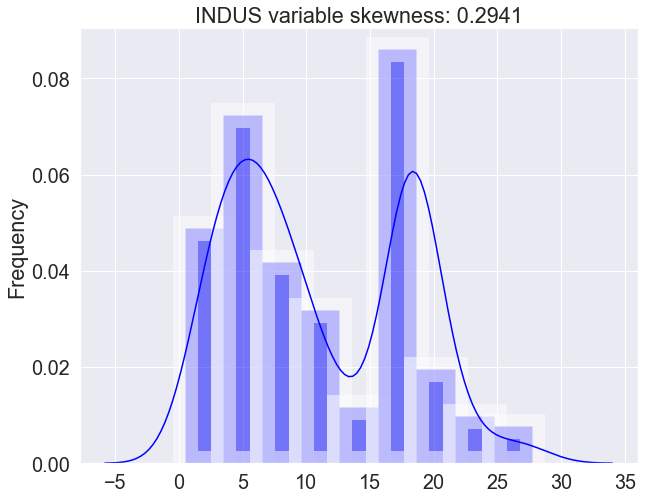

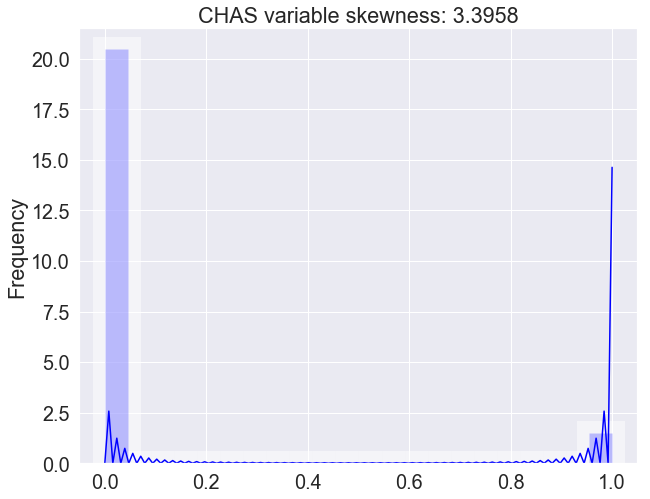

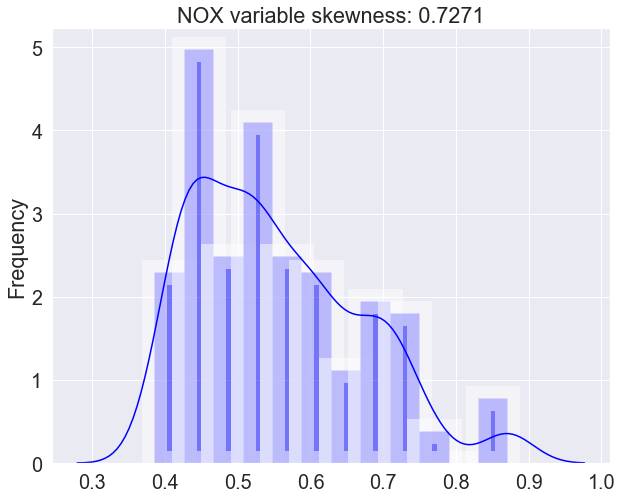

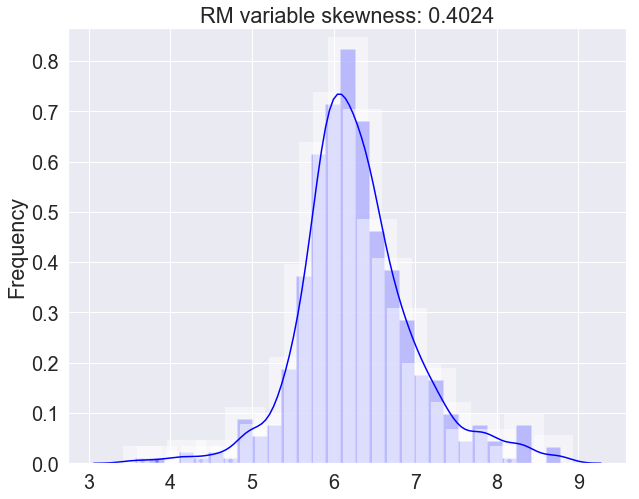

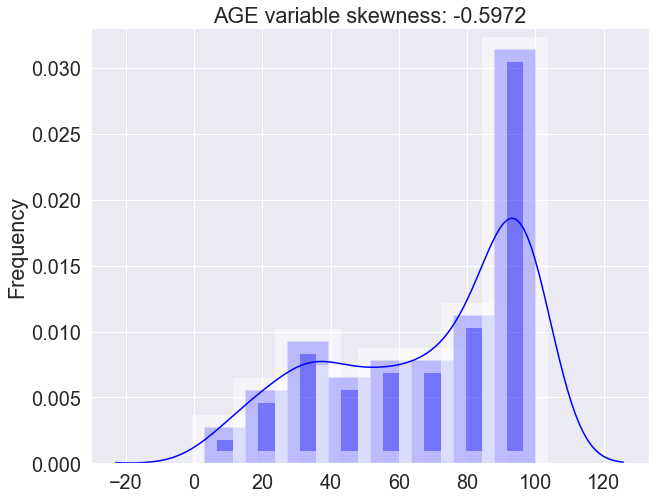

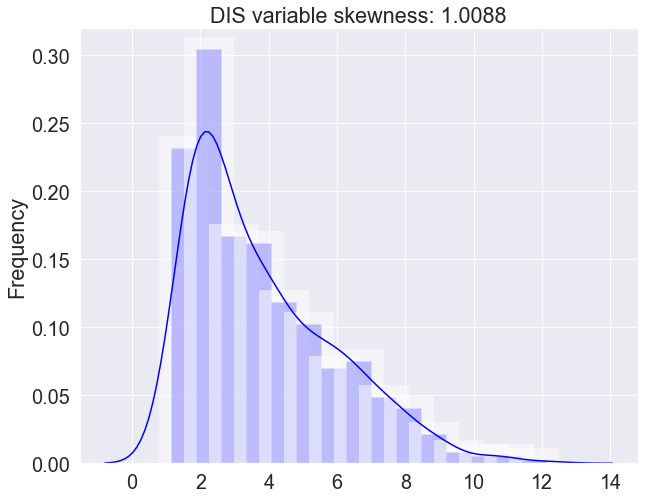

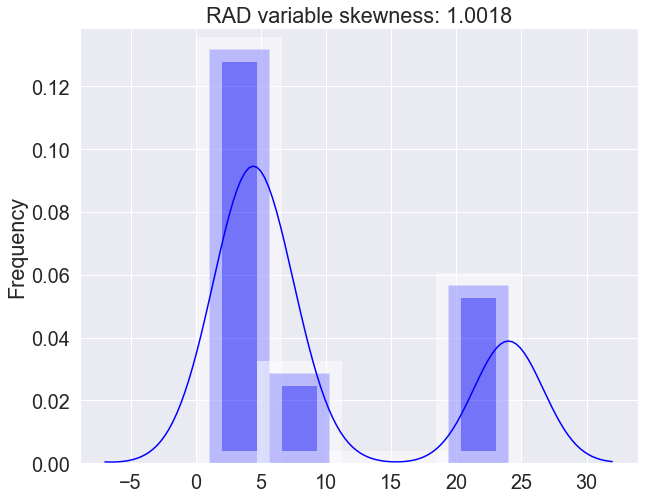

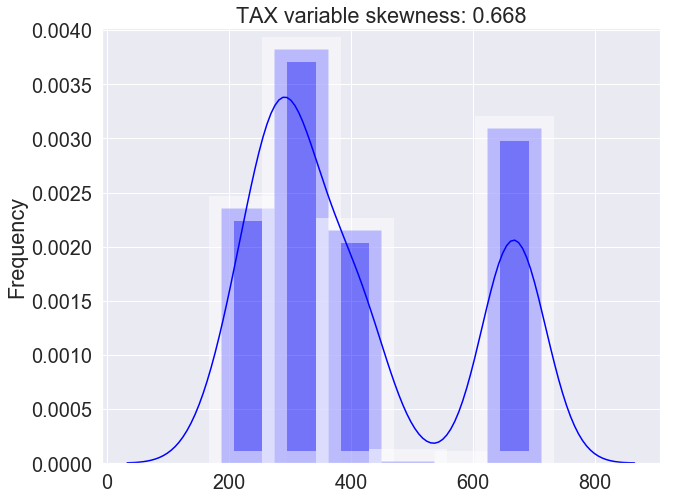

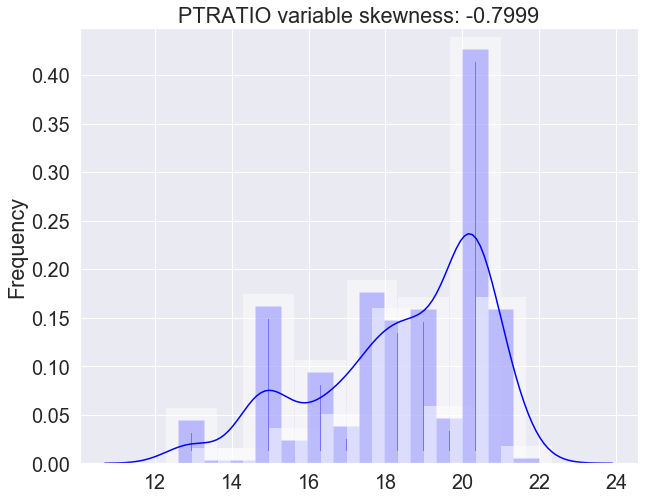

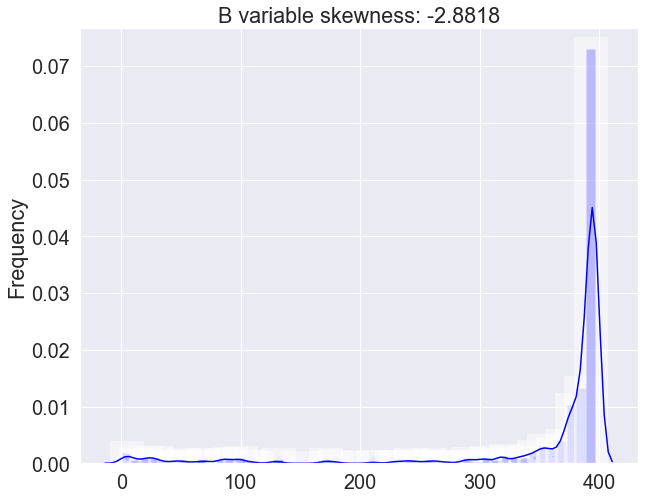

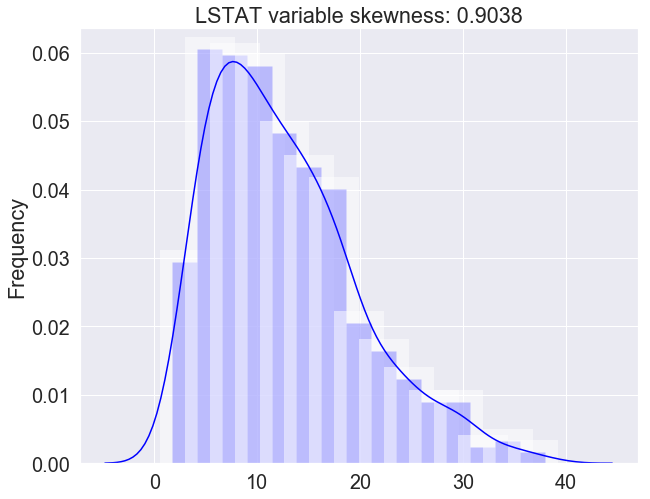

In [35]:
# Look distribution and compute the skewness for each feature
from scipy.stats import skew
for each in df.columns[:-1]:
    sb.set(rc = {'figure.figsize': (10,8)}, font_scale = 1.8)
    ax = sb.distplot(df[each].values, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
    ax.set(title = '{} variable skewness: {}'.format(each, round(skew(a=df[each]), 4)), ylabel = 'Frequency')
    plt.show()

In [36]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


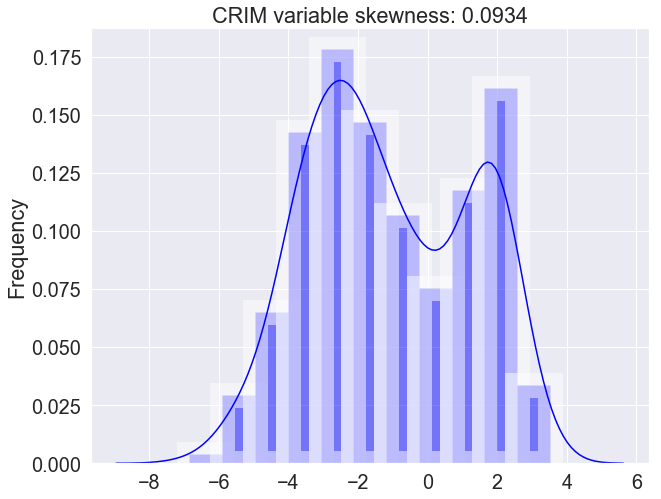

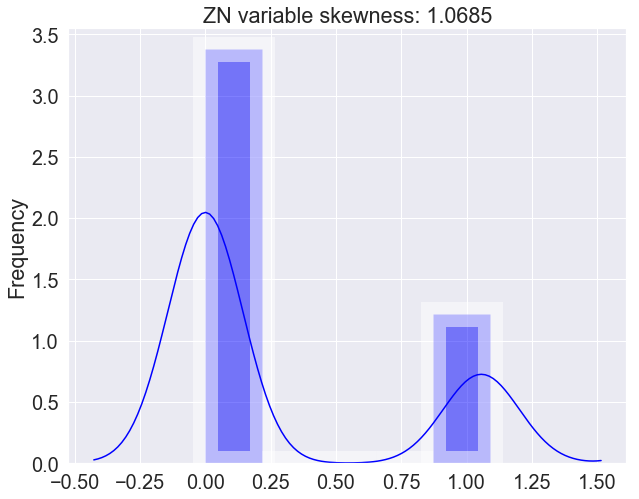

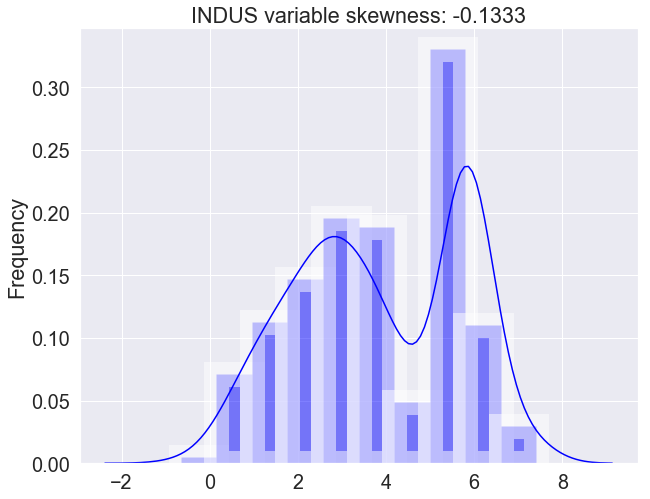

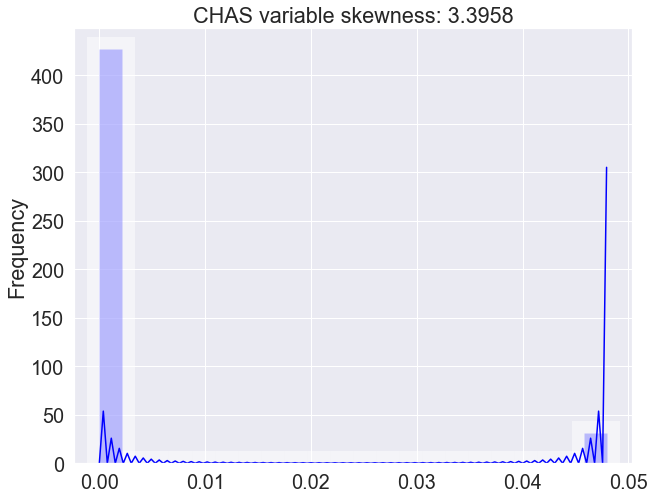

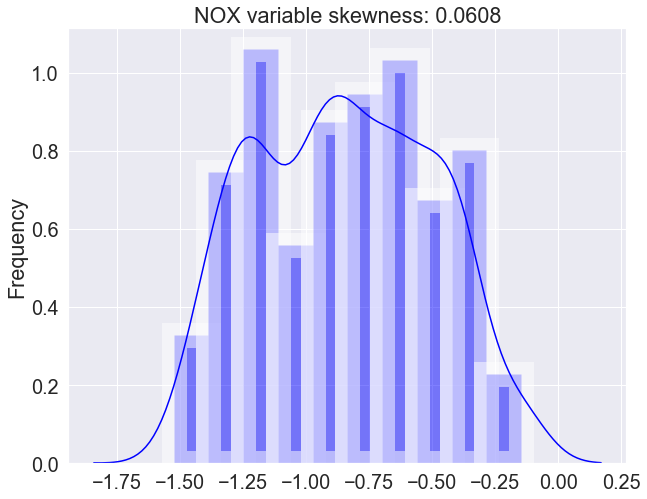

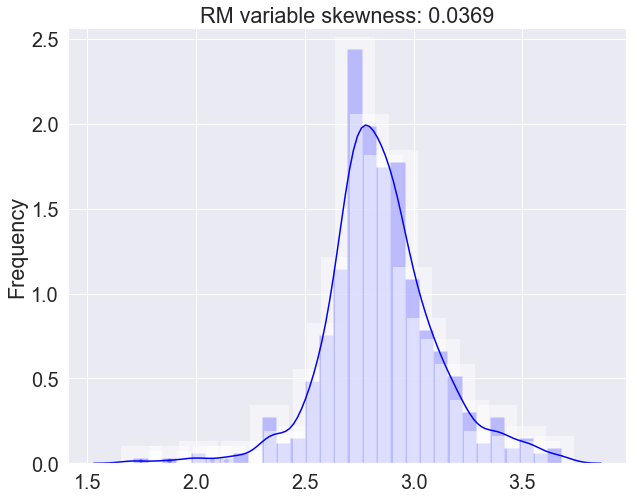

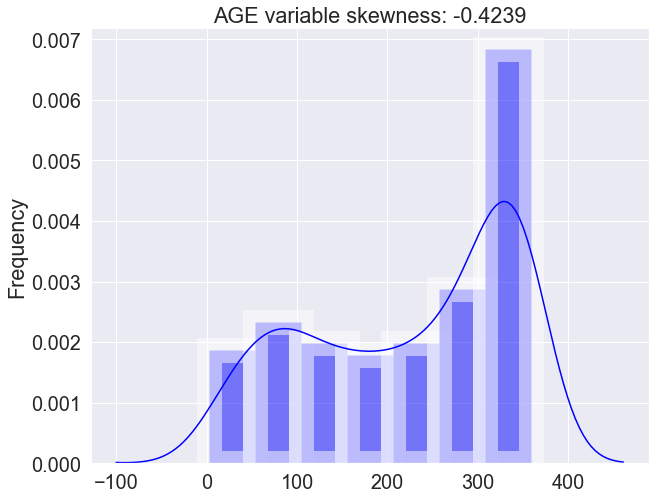

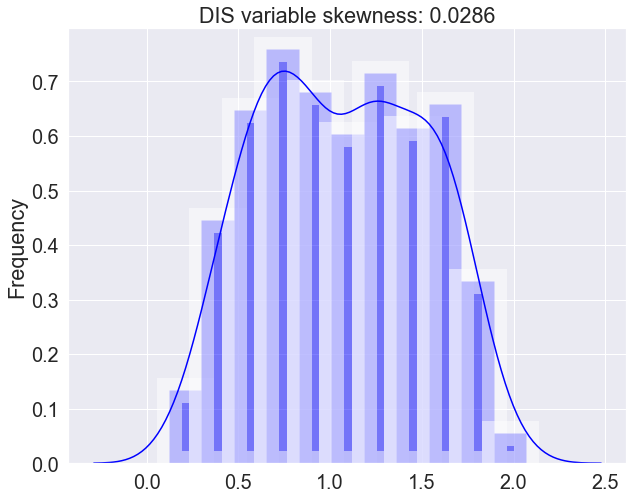

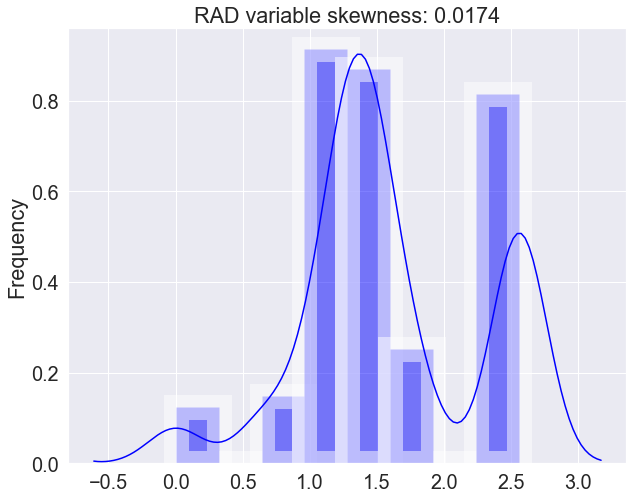

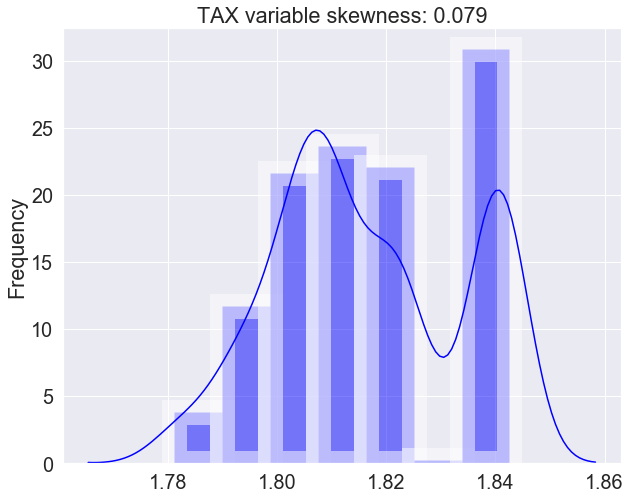

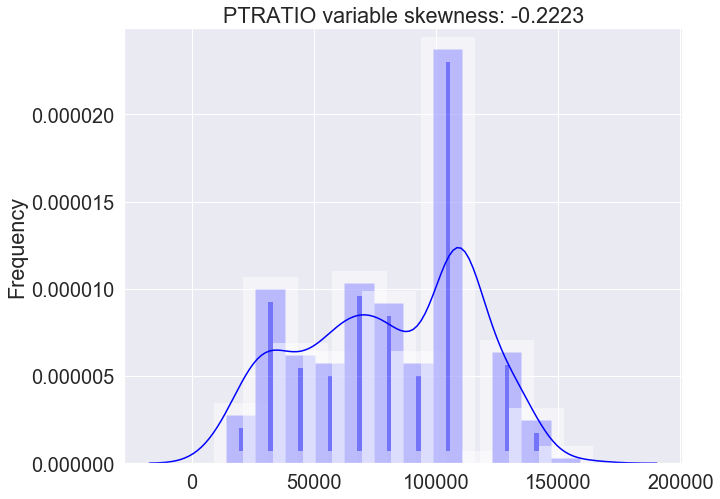

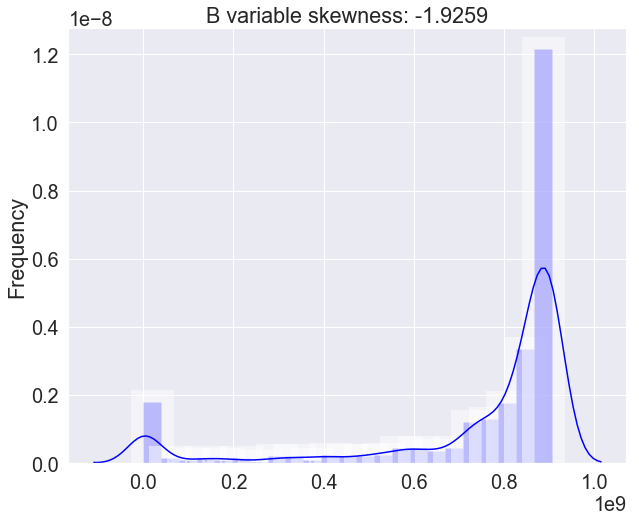

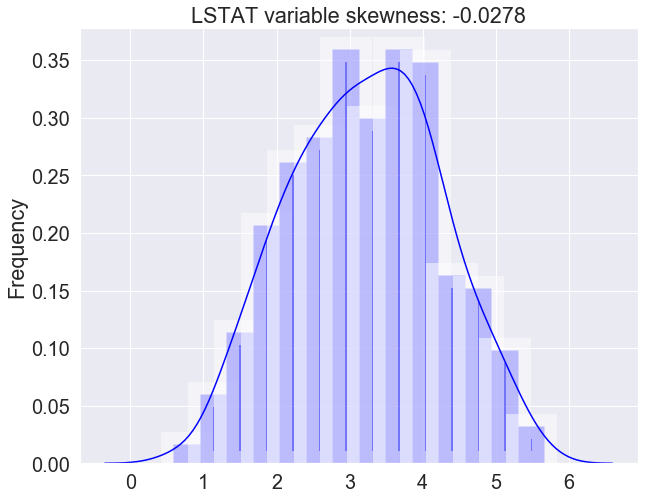

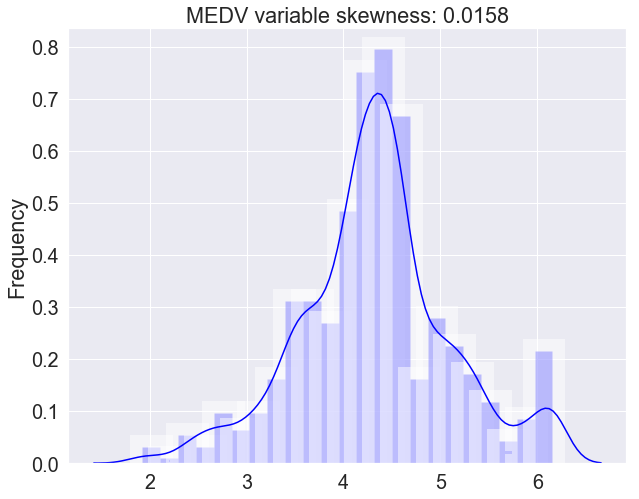

In [37]:
# Box-cox transformation
from scipy.stats import boxcox

all_data = df.copy()
for col in all_data.columns:
    
    # Other common transformations
    #original_skewness = skew(a=df[col])
    #log_skewness = skew(a=np.log(df[col] + 1))
    #exp_skewness = skew(a=np.exp(df[col]))
    #sqrt_skewness = skew(a=np.sqrt(df[col]))
    #inverse_skewness = skew(a=(df[col] + 1)**(-1))
    
    # If there is any negative value in any feature, can't perform the box-cox transformation on this feature
    # The minimum value is 0 for some features, observed from the above table
    if np.min(all_data[col].values) <= 0:
        box_cox_trans_values = boxcox(all_data[col].values + 1)[0]
        boxcox_skewness = skew(a=box_cox_trans_values)
    else:
        box_cox_trans_values = boxcox(all_data[col].values)[0]
        boxcox_skewness = skew(a=box_cox_trans_values)
    
    if col != 'MEDV':
        all_data[col] = box_cox_trans_values
    elif col == 'MEDV':
        pass
    
    # Visualization part
    sb.set(rc = {'figure.figsize': (10,8)}, font_scale = 1.8)
    ax = sb.distplot(box_cox_trans_values, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
    ax.set(title = '{} variable skewness: {}'.format(col,round(boxcox_skewness, 4)), 
           ylabel = 'Frequency')
    plt.show()

In [38]:
# Make sure the transformation result doesn't impact on the original dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# Model 2: Box-cox transformation results (only on independent variables!)
all_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-6.843991,1.027774,1.008733,0.0,-0.834416,2.960568,201.623518,1.264870,0.000000,1.807258,32745.328788,9.053187e+08,1.938257,24.0
1,-4.447834,0.000000,3.073963,0.0,-1.092408,2.905657,260.624232,1.418585,0.660260,1.796577,63253.459834,9.053187e+08,2.876983,21.6
2,-4.448936,0.000000,3.073963,0.0,-1.092408,3.171385,184.738585,1.418585,0.660260,1.796577,63253.459834,8.717686e+08,1.640387,34.7
3,-4.194470,0.000000,0.926596,0.0,-1.140400,3.107843,125.260157,1.571460,1.017528,1.791645,78392.260534,8.864929e+08,1.222396,33.4
4,-3.122838,0.000000,0.926596,0.0,-1.140400,3.158548,157.195603,1.571460,1.017528,1.791645,78392.260534,9.053187e+08,2.036925,36.2


In [40]:
# Preprocessing: standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_data[all_data.columns[:-1]])
standardized_data = pd.DataFrame(standardized_data, columns=all_data.columns[:-1])

# Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(standardized_data, all_data.MEDV, 
                                                    test_size=0.2, random_state=0) 

In [41]:
# Model 2 fitting
x_train = sm.add_constant(x_train) 

model_2 = sm.OLS(y_train, x_train).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sat, 17 Nov 2018   Prob (F-statistic):          7.76e-128
Time:                        14:45:48   Log-Likelihood:                -1144.8
No. Observations:                 404   AIC:                             2318.
Df Residuals:                     390   BIC:                             2374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4887      0.210    107.204      0.000      22.076      22.901
CRIM           0.7771      0.551      1.411      0.159      -0.306       1.860
ZN             0.1350      0.301      0.449      0.654      -0.457       0.727
INDUS         -0.8196      0.406     -2.018      0.044      -1.618      -0.021
CHAS           0.5945      0.215      2.764      0.006       0.172       1.017
NOX           -1.5711      0.567     -2.771      0.006      -2.686      -0.456
RM             1.7434      0.300      5.818      0.000       1.154       2.332
AGE            0.5126      0.412      1.244      0.214      -0.297       1.323
DIS           -2.8861      0.483     -5.971      0.000      -3.836      -1.936
RAD            0.5282      0.412      1.284      0.200      -0.281       1.337
TAX           -1.5347      0.385     -3.985      0.000      -2.292      -0.777
PTRATIO       -1.6845      0.269     -6.262      0.000      -2.213      -1.156
B              0.3738      0.254      1.471      0.142      -0.126       0.873
LSTAT         -5.6183      0.371    -15.130      0.000      -6.348      -4.888
==============================================================================
Omnibus:                       43.923   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.769
Skew:                           0.640   Prob(JB):                     1.75e-18
Kurtosis:                       4.794   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Model 2 result reports
predictions = model_2.predict(sm.add_constant(x_test))
r_squared = r2_score(y_true=y_test, y_pred=predictions)
model_2_test_mse = mean_squared_error(y_true=y_test, y_pred=predictions)
model_2_train_mse = mean_squared_error(y_true=y_train, y_pred=model_2.fittedvalues)

for i in range(len(model_2.params)):
    print('{} coefficient is {}.'.format(model_2.params.index[i], 
                                         round(model_2.params[i], 4)))
print()
print('Model 2 R-squared (on test data) is {}.'.format(round(r_squared, 4)))
print('Model 2 MSE (on test data) is {}.'.format(round(model_2_test_mse, 4)))
print('Model 2 MSE (on train data) is {}.'.format(round(model_2_train_mse, 4)))

const coefficient is 22.4887.
CRIM coefficient is 0.7771.
ZN coefficient is 0.135.
INDUS coefficient is -0.8196.
CHAS coefficient is 0.5945.
NOX coefficient is -1.5711.
RM coefficient is 1.7434.
AGE coefficient is 0.5126.
DIS coefficient is -2.8861.
RAD coefficient is 0.5282.
TAX coefficient is -1.5347.
PTRATIO coefficient is -1.6845.
B coefficient is 0.3738.
LSTAT coefficient is -5.6183.

Model 2 R-squared (on test data) is 0.6512.
Model 2 MSE (on test data) is 28.3991.
Model 2 MSE (on train data) is 16.9366.


## 5.2 Using box-cox transformation on all independent variables and dependent variable

In [43]:
# Preprocessing: standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_data[all_data.columns[:-1]])
standardized_data = pd.DataFrame(standardized_data, columns=all_data.columns[:-1])

# Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(standardized_data, boxcox(all_data.MEDV)[0], 
                                                    test_size=0.2, random_state=0) 

In [44]:
# Model 3 fitting (with box-cox transformed dependent variable, MEDV)
x_train = sm.add_constant(x_train) 

model_3 = sm.OLS(y_train, x_train).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sat, 17 Nov 2018   Prob (F-statistic):          5.14e-129
Time:                        14:45:54   Log-Likelihood:                -149.35
No. Observations:                 404   AIC:                             326.7
Df Residuals:                     390   BIC:                             382.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3208      0.018    242.054      0.000       4.286       4.356
CRIM           0.0153      0.047      0.327      0.744      -0.077       0.107
ZN            -0.0184      0.026     -0.719      0.473      -0.069       0.032
INDUS         -0.0238      0.035     -0.689      0.491      -0.092       0.044
CHAS           0.0497      0.018      2.715      0.007       0.014       0.086
NOX           -0.0695      0.048     -1.440      0.151      -0.164       0.025
RM             0.0991      0.025      3.888      0.000       0.049       0.149
AGE            0.0475      0.035      1.355      0.176      -0.021       0.116
DIS           -0.1106      0.041     -2.689      0.007      -0.191      -0.030
RAD            0.0375      0.035      1.072      0.284      -0.031       0.106
TAX           -0.1385      0.033     -4.225      0.000      -0.203      -0.074
PTRATIO       -0.1480      0.023     -6.464      0.000      -0.193      -0.103
B              0.0636      0.022      2.943      0.003       0.021       0.106
LSTAT         -0.4914      0.032    -15.551      0.000      -0.554      -0.429
==============================================================================
Omnibus:                       23.434   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.554
Skew:                          -0.052   Prob(JB):                     1.07e-16
Kurtosis:                       5.088   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$ y = \frac {(x^\lambda - 1)}  {\lambda}, \lambda > 0 $$

$$ y = log(x), \lambda = 0 $$

In [45]:
# Notice: Since we have transformed the dependent variable using box-cox (from above formula), 
# we need to transform it back to the original values.
# lambda value
box_cox_lambda = boxcox(all_data.MEDV)[1]
box_cox_lambda

0.21662091493775448

$$ y_{original} = (y_{boxcox}·\lambda + 1) ^ {\lambda^{-1}} $$

In [46]:
# Original values VS Transformed box-cox values back to the original values  
all_data.MEDV[:5].values, (boxcox(all_data.MEDV)[0][:5]*box_cox_lambda + 1)**(box_cox_lambda**(-1))

(array([24. , 21.6, 34.7, 33.4, 36.2]), array([24. , 21.6, 34.7, 33.4, 36.2]))

In [47]:
# Model 3 result reports
test_predictions = model_3.predict(sm.add_constant(x_test))
test_predictions = (test_predictions*box_cox_lambda + 1) ** (box_cox_lambda**(-1))
train_predictions = model_3.fittedvalues
train_predictions = (train_predictions*box_cox_lambda + 1) ** (box_cox_lambda**(-1))

y_test = (y_test*box_cox_lambda + 1) ** (box_cox_lambda**(-1))
y_train = (y_train*box_cox_lambda + 1) ** (box_cox_lambda**(-1))

r_squared = r2_score(y_true=y_test, y_pred=test_predictions)
model_3_test_mse = mean_squared_error(y_true=y_test, y_pred=test_predictions)
model_3_train_mse = mean_squared_error(y_true=y_train, y_pred=train_predictions)

for i in range(len(model_3.params)):
    print('{} coefficient is {}.'.format(model_3.params.index[i], 
                                         round(model_3.params[i], 4)))
print()
print('Model 3 R-squared (on test data) is {}.'.format(round(r_squared, 4)))
print('Model 3 MSE (on test data) is {}.'.format(round(model_3_test_mse, 4)))
print('Model 3 MSE (on train data) is {}.'.format(round(model_3_train_mse, 4)))

const coefficient is 4.3208.
CRIM coefficient is 0.0153.
ZN coefficient is -0.0184.
INDUS coefficient is -0.0238.
CHAS coefficient is 0.0497.
NOX coefficient is -0.0695.
RM coefficient is 0.0991.
AGE coefficient is 0.0475.
DIS coefficient is -0.1106.
RAD coefficient is 0.0375.
TAX coefficient is -0.1385.
PTRATIO coefficient is -0.148.
B coefficient is 0.0636.
LSTAT coefficient is -0.4914.

Model 3 R-squared (on test data) is 0.6094.
Model 3 MSE (on test data) is 31.8083.
Model 3 MSE (on train data) is 15.4454.


**Notice: Box-cox changes the skewness and kurtosis of a distribution.**
- Reference: https://en.wikipedia.org/wiki/Kurtosis

In [48]:
# The higher the kurtosis is, the more outliers a distribution has
from scipy.stats import kurtosis
print(kurtosis(boxcox(df.MEDV)[1]), kurtosis(df.MEDV))
print(kurtosis(df.RM), kurtosis(boxcox(df.RM)[0]))

-3.0 1.4686287722747462
1.8610269725310244 2.1044676823775577


In [49]:
# Hand-calculations
print(sum((boxcox(df.RM)[0] - boxcox(df.RM)[0].mean()) ** 4) / 506)
print((sum((boxcox(df.RM)[0] - boxcox(df.RM)[0].mean()) ** 2) / 506) ** 2)
print(0.02140449154339835/0.004193285740116313 -3)

0.02140449154339835
0.004193285740116313
2.1044676823775514


In [50]:
# The closer the skewness to 0, the closer a distribution to a normal distribution
print(skew(df.MEDV), skew(boxcox(df.MEDV)[0]))
print(skew(df.RM), skew(boxcox(df.RM)[0]))

1.104810822864635 0.015834808020819994
0.40241466802496245 0.036940616646003774


## 5.3 Outlier imputation (Capping) + Box-cox transformation on all independent variables

In [51]:
# Outlier imputation (Capping)
def outlier_capping(data):
    Q1 = data.quantile(q = [0.25, 0.75])[0.25]
    Q3 = data.quantile(q = [0.25, 0.75])[0.75]
    
    IQR = Q3 - Q1
    upper_threshold = 1.5*IQR + Q3
    lower_threshold = Q1 - 1.5*IQR
    
    #print(lower_threshold, upper_threshold)
    #print((df.RM.values <= lower_threshold).sum(), (df.RM.values >= upper_threshold).sum())


    capped_data = data.replace(
        data[data >= upper_threshold], upper_threshold)
    
    capped_data = capped_data.replace(
        capped_data[capped_data <= lower_threshold],lower_threshold)
    
    if round(capped_data.describe()['max'], 2) > round(upper_threshold, 2):
        print('Upper outlier imputation error!')
    elif round(capped_data.describe()['max'], 2) <= round(upper_threshold, 2):
        print('No upper outlier imputation error.')
        
    if round(capped_data.describe()['min'], 2) < round(lower_threshold, 2):
        print('Lower outlier imputation error!')
    elif round(capped_data.describe()['min'], 2) >= round(lower_threshold, 2):
        print('No lower outlier imputation error.')
        
    return capped_data

In [52]:
all_data = df.copy()
all_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
for col in all_data.columns[:-1]:
    if col == 'CHAS':
        pass
    elif col != 'CHAS':
        all_data[col] = outlier_capping(data = all_data[col]).values

No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.
No upper outlier imputation error.
No lower outlier imputation error.


In [54]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [55]:
all_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.225032,6.963439,11.136779,0.069170,0.554695,6.275312,68.574901,3.783947,9.549407,408.237154,18.463834,381.918836,12.612011,22.532806
std,3.313353,12.028788,6.860353,0.253994,0.115878,0.630242,28.148861,2.069765,8.707259,168.537116,2.143924,19.054913,7.016829,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.778500,2.900000,1.129600,1.000000,187.000000,13.200000,344.106250,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.069639,31.250000,27.740000,1.000000,0.871000,7.730500,100.000000,9.820800,24.000000,711.000000,22.000000,396.900000,31.962500,50.000000


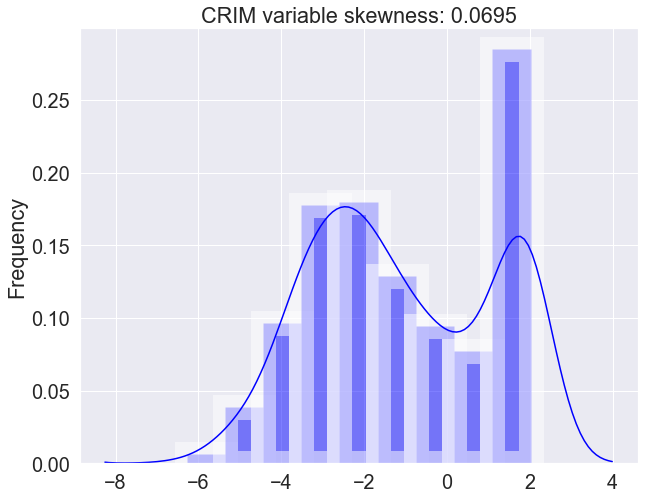

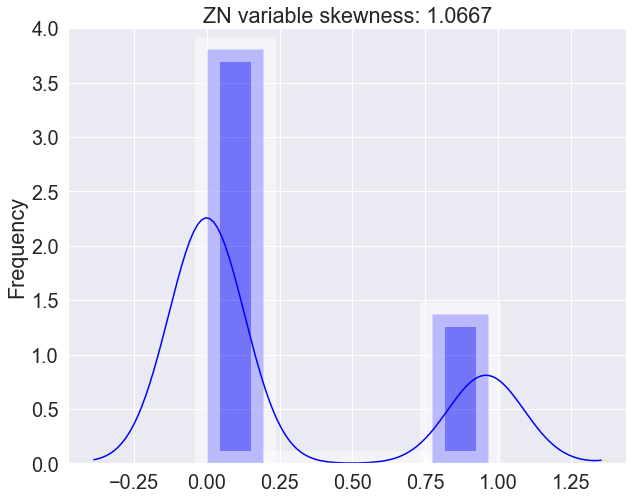

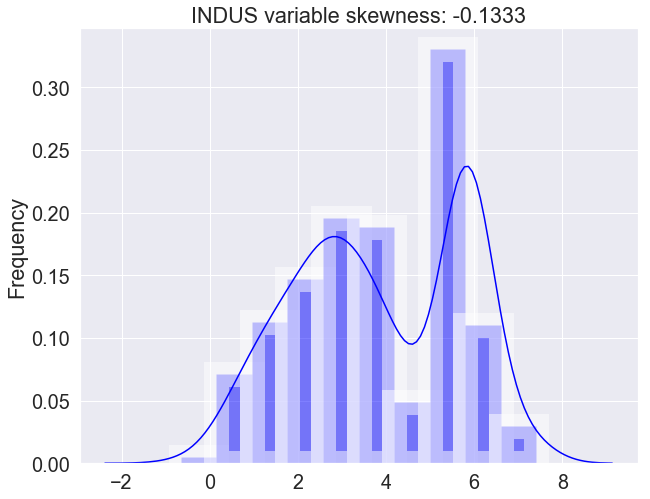

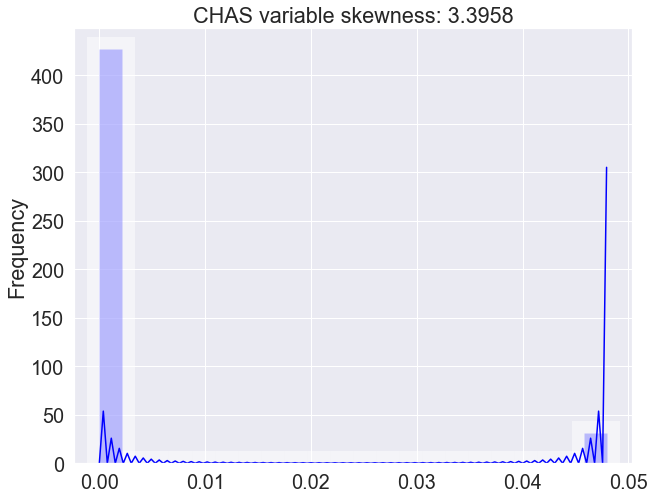

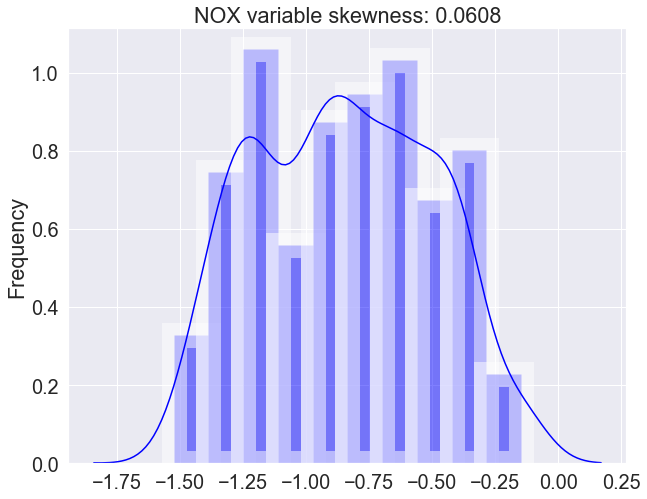

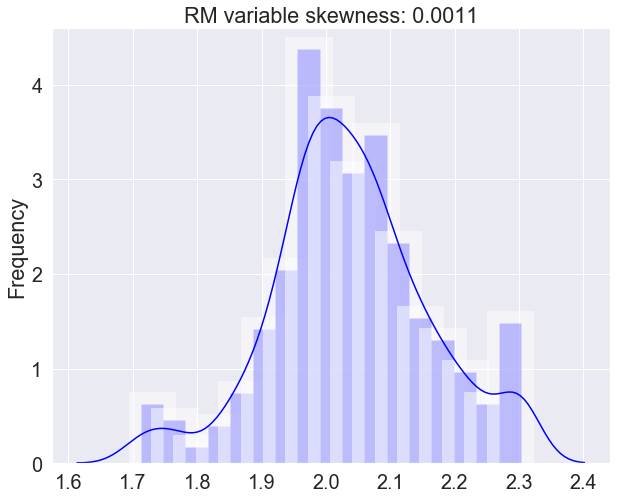

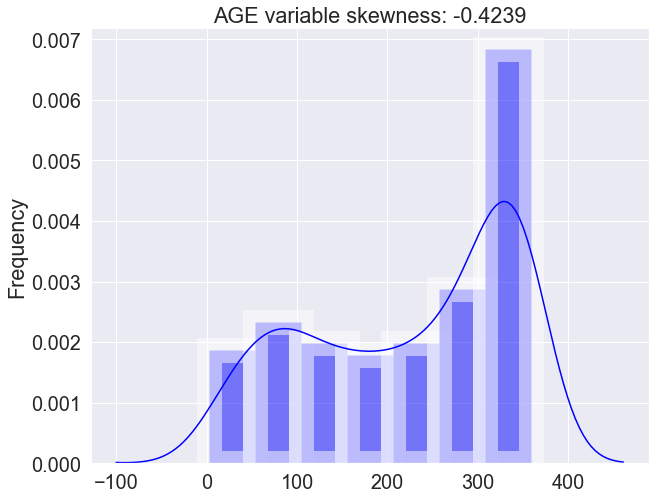

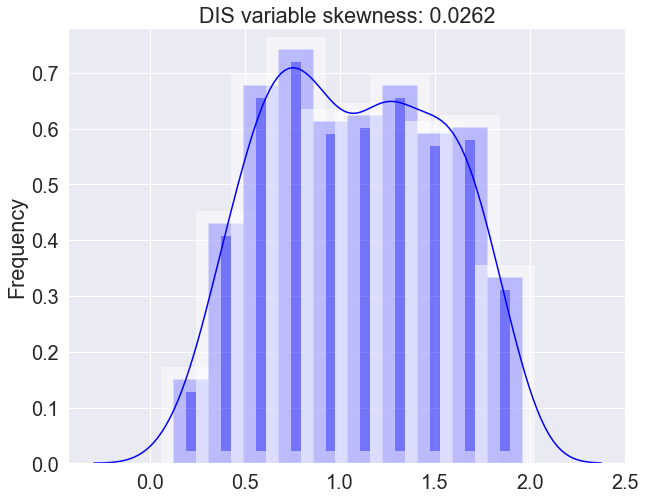

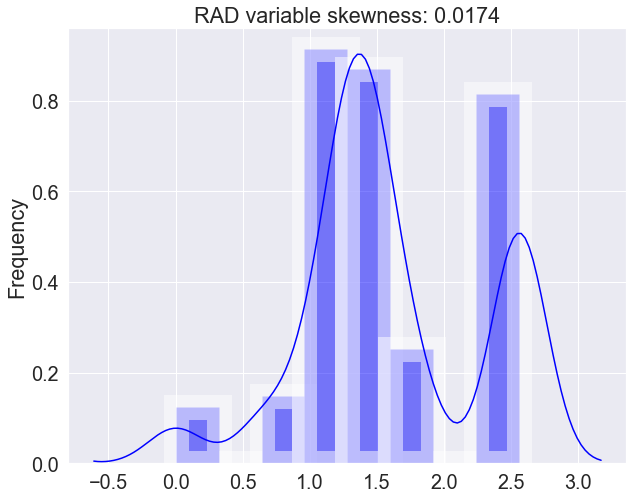

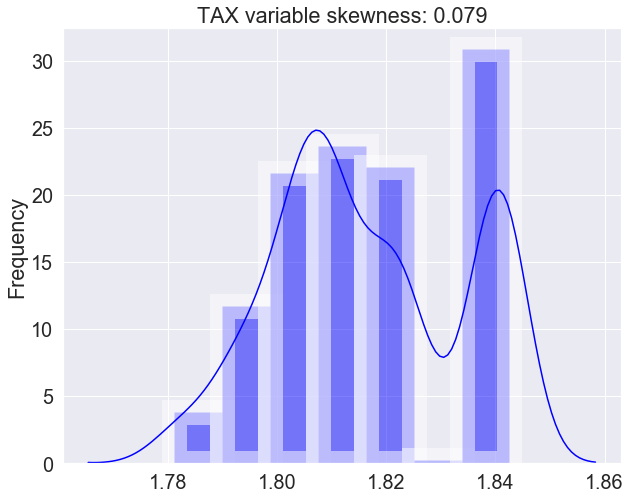

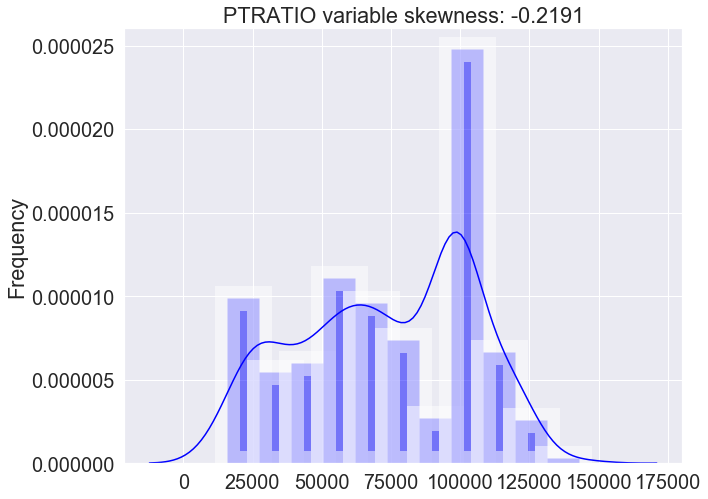

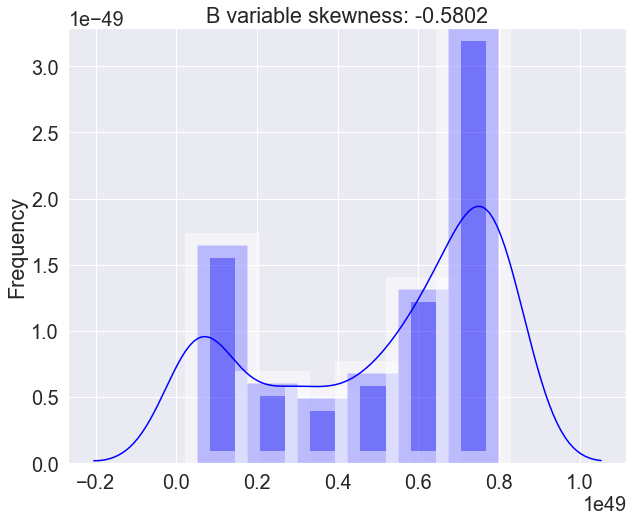

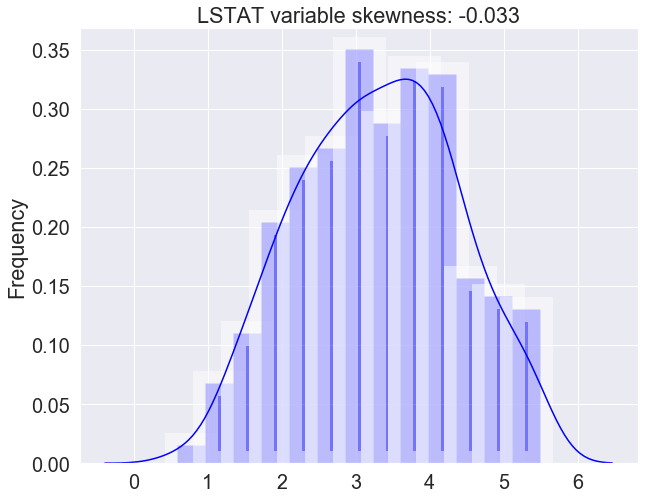

In [56]:
# Box-cox transformation
for col in all_data.columns[:-1]:
    if np.min(all_data[col].values) <= 0:
        box_cox_trans_values = boxcox(all_data[col].values + 1)[0]
        boxcox_skewness = skew(a=box_cox_trans_values)
    else:
        box_cox_trans_values = boxcox(all_data[col].values)[0]
        boxcox_skewness = skew(a=box_cox_trans_values)
    
    if col != 'MEDV':
        all_data[col] = box_cox_trans_values
    elif col == 'MEDV':
        pass
    
    # Visualization part
    sb.set(rc = {'figure.figsize': (10,8)}, font_scale = 1.8)
    ax = sb.distplot(box_cox_trans_values, kde = True, color = 'blue', hist_kws = {"linewidth": 25, 'alpha': 0.5})
    ax.set(title = '{} variable skewness: {}'.format(col,round(boxcox_skewness, 4)), 
           ylabel = 'Frequency')
    plt.show()

In [57]:
all_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000
mean,-1.069481,0.253530,3.886153,0.003316,-0.848998,2.037469,225.018985,1.077286,1.600276,1.816844,73191.759663,5.113299e+48,3.306451,22.532806
std,2.155501,0.422886,1.878065,0.012178,0.346560,0.123559,112.342667,0.454418,0.665761,0.017253,30647.189075,2.791657e+48,1.065255,9.197104
min,-6.285364,0.000000,-0.659680,0.000000,-1.525087,1.712175,2.364168,0.120837,0.000000,1.781147,15785.131933,5.065126e+47,0.587209,5.000000
25%,-2.776966,0.000000,2.400241,0.000000,-1.181340,1.964172,122.408254,0.705035,1.258874,1.804238,51964.415368,2.717347e+48,2.490784,17.025000
50%,-1.439918,0.000000,3.860232,0.000000,-0.834416,2.029756,254.422260,1.075962,1.439431,1.812571,76811.480710,6.103435e+48,3.336923,21.200000
75%,1.234645,0.922914,5.773945,0.000000,-0.589811,2.109721,330.186034,1.471584,2.559898,1.840450,98900.487060,7.717581e+48,4.107188,25.000000
max,2.016087,0.965455,7.412637,0.047945,-0.147226,2.303121,358.441867,1.957299,2.559898,1.842560,142918.109321,7.975494e+48,5.494777,50.000000


In [58]:
# Preprocessing: standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_data[all_data.columns[:-1]])
standardized_data = pd.DataFrame(standardized_data, columns=all_data.columns[:-1])

# Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(standardized_data, all_data.MEDV, 
                                                    test_size=0.2, random_state=0) 

In [59]:
# Model 4 fitting
x_train = sm.add_constant(x_train) 

model_4 = sm.OLS(y_train, x_train).fit()

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 17 Nov 2018   Prob (F-statistic):          3.87e-127
Time:                        14:46:28   Log-Likelihood:                -1146.5
No. Observations:                 404   AIC:                             2321.
Df Residuals:                     390   BIC:                             2377.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4936      0.211    106.789      0.000      22.079      22.908
CRIM           0.9392      0.567      1.657      0.098      -0.175       2.053
ZN             0.1692      0.301      0.562      0.574      -0.422       0.761
INDUS         -0.8901      0.410     -2.174      0.030      -1.695      -0.085
CHAS           0.6432      0.215      2.986      0.003       0.220       1.067
NOX           -1.7234      0.577     -2.987      0.003      -2.858      -0.589
RM             1.6053      0.302      5.317      0.000       1.012       2.199
AGE            0.5756      0.413      1.392      0.165      -0.237       1.388
DIS           -2.9768      0.488     -6.104      0.000      -3.936      -2.018
RAD            0.4008      0.415      0.966      0.334      -0.415       1.216
TAX           -1.6590      0.386     -4.295      0.000      -2.418      -0.900
PTRATIO       -1.6472      0.271     -6.088      0.000      -2.179      -1.115
B             -0.1862      0.241     -0.773      0.440      -0.660       0.288
LSTAT         -5.7596      0.374    -15.418      0.000      -6.494      -5.025
==============================================================================
Omnibus:                       42.630   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.402
Skew:                           0.667   Prob(JB):                     5.16e-16
Kurtosis:                       4.550   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Model 4 result reports
predictions = model_4.predict(sm.add_constant(x_test))
r_squared = r2_score(y_true=y_test, y_pred=predictions)
model_4_test_mse = mean_squared_error(y_true=y_test, y_pred=predictions)
model_4_train_mse = mean_squared_error(y_true=y_train, y_pred=model_4.fittedvalues)


for i in range(len(model_4.params)):
    print('{} coefficient is {}.'.format(model_4.params.index[i], 
                                         round(model_4.params[i], 4)))
print()
print('Model 4 R-squared (on test data) is {}.'.format(round(r_squared, 4)))
print('Model 4 MSE (on test data) is {}.'.format(round(model_4_test_mse, 4)))
print('Model 4 MSE (on train data) is {}.'.format(round(model_4_train_mse, 4)))

const coefficient is 22.4936.
CRIM coefficient is 0.9392.
ZN coefficient is 0.1692.
INDUS coefficient is -0.8901.
CHAS coefficient is 0.6432.
NOX coefficient is -1.7234.
RM coefficient is 1.6053.
AGE coefficient is 0.5756.
DIS coefficient is -2.9768.
RAD coefficient is 0.4008.
TAX coefficient is -1.659.
PTRATIO coefficient is -1.6472.
B coefficient is -0.1862.
LSTAT coefficient is -5.7596.

Model 4 R-squared (on test data) is 0.645.
Model 4 MSE (on test data) is 28.9107.
Model 4 MSE (on train data) is 17.0777.


## 5.4 Outlier imputation (Capping) + Box-cox transformation on all independent variables Box-cox transformation on the dependent variable

In [61]:
# Preprocessing: standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_data[all_data.columns[:-1]])
standardized_data = pd.DataFrame(standardized_data, columns=all_data.columns[:-1])

# Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(standardized_data, boxcox(all_data.MEDV)[0], 
                                                    test_size=0.2, random_state=0) 

In [62]:
# Model 5 fitting (with box-cox transformed dependent variable, MEDV)
x_train = sm.add_constant(x_train) 

model_5 = sm.OLS(y_train, x_train).fit()

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     120.4
Date:                Sat, 17 Nov 2018   Prob (F-statistic):          1.37e-127
Time:                        14:46:33   Log-Likelihood:                -152.77
No. Observations:                 404   AIC:                             333.5
Df Residuals:                     390   BIC:                             389.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3217      0.018    240.076      0.000       4.286       4.357
CRIM           0.0470      0.048      0.971      0.332      -0.048       0.142
ZN            -0.0139      0.026     -0.540      0.589      -0.064       0.037
INDUS         -0.0272      0.035     -0.777      0.437      -0.096       0.042
CHAS           0.0542      0.018      2.946      0.003       0.018       0.090
NOX           -0.0888      0.049     -1.801      0.072      -0.186       0.008
RM             0.0920      0.026      3.566      0.000       0.041       0.143
AGE            0.0534      0.035      1.513      0.131      -0.016       0.123
DIS           -0.1152      0.042     -2.764      0.006      -0.197      -0.033
RAD            0.0179      0.035      0.504      0.615      -0.052       0.088
TAX           -0.1522      0.033     -4.609      0.000      -0.217      -0.087
PTRATIO       -0.1440      0.023     -6.227      0.000      -0.189      -0.099
B              0.0109      0.021      0.531      0.596      -0.030       0.051
LSTAT         -0.5085      0.032    -15.929      0.000      -0.571      -0.446
==============================================================================
Omnibus:                       15.871   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.612
Skew:                          -0.018   Prob(JB):                     6.80e-09
Kurtosis:                       4.494   Cond. No.                         8.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
box_cox_lambda = boxcox(all_data.MEDV)[1]
box_cox_lambda

0.21662091493775448

In [64]:
# Model 5 result reports
test_predictions = model_5.predict(sm.add_constant(x_test))
test_predictions = (test_predictions*box_cox_lambda + 1) ** (box_cox_lambda**(-1))
train_predictions = model_5.fittedvalues
train_predictions = (train_predictions*box_cox_lambda + 1) ** (box_cox_lambda**(-1))

y_test = (y_test*box_cox_lambda + 1) ** (box_cox_lambda**(-1))
y_train = (y_train*box_cox_lambda + 1) ** (box_cox_lambda**(-1))

r_squared = r2_score(y_true=y_test, y_pred=test_predictions)
model_5_test_mse = mean_squared_error(y_true=y_test, y_pred=test_predictions)
model_5_train_mse = mean_squared_error(y_true=y_train, y_pred=train_predictions)

for i in range(len(model_5.params)):
    print('{} coefficient is {}.'.format(model_5.params.index[i], 
                                         round(model_5.params[i], 4)))
print()
print('Model 5 R-squared (on test data) is {}.'.format(round(r_squared, 4)))
print('Model 5 MSE (on test data) is {}.'.format(round(model_5_test_mse, 4)))
print('Model 5 MSE (on train data) is {}.'.format(round(model_5_train_mse, 4)))

const coefficient is 4.3217.
CRIM coefficient is 0.047.
ZN coefficient is -0.0139.
INDUS coefficient is -0.0272.
CHAS coefficient is 0.0542.
NOX coefficient is -0.0888.
RM coefficient is 0.092.
AGE coefficient is 0.0534.
DIS coefficient is -0.1152.
RAD coefficient is 0.0179.
TAX coefficient is -0.1522.
PTRATIO coefficient is -0.144.
B coefficient is 0.0109.
LSTAT coefficient is -0.5085.

Model 5 R-squared (on test data) is 0.6029.
Model 5 MSE (on test data) is 32.333.
Model 5 MSE (on train data) is 15.8346.


# 6. Model Improvement Summary

| Model Number | Improvement Method | Adj. R (on train data) | Adj. R (on test data) | MSE (on train data) | MSE (on test data) | Rank by MSE (on test data |
| -- | -- | -- | -- | -- | -- | -- |
| 1 | Standardization | 0.765 | 0.589 | 19.33 | 33.45 | 5 |
| 2 | Standardization + box-cox on all independent variables | 0.794 | 0.651 | 16.94 | 28.40 | 1 |
| 3 | Standardization + box-cox on all variables | 0.797 | 0.609 | 15.45 | 31.81 | 3 |
| 4 | Outlier imputation (Capping) + Standardization + box-cox on all independent variables  | 0.793 | 0.645 | 17.08 | 28.91 | 2 |
| 5 | Outlier imputation (Capping) + Standardization + box-cox on all variables | 0.794 | 0.603 | 15.83 | 32.33 | 4 |

# 7. Best Model Report - Model 2
- **7.1 Preprocessing**
- **7.2 Model Fitting - Model 2**
- **7.3 Model Results - Model 2**
- **7.4 Model Diagnosis - Model 2**
- **7.5 Coefficient Report - Model 2**

## 7.1 Preprocessing

In [65]:
# Box-cox transformation
from scipy.stats import boxcox

all_data = df.copy()
for col in all_data.columns:
    if np.min(all_data[col].values) <= 0:
        box_cox_trans_values = boxcox(all_data[col].values + 1)[0]
        boxcox_skewness = skew(a=box_cox_trans_values)
    else:
        box_cox_trans_values = boxcox(all_data[col].values)[0]
        boxcox_skewness = skew(a=box_cox_trans_values)
    
    if col != 'MEDV':
        all_data[col] = box_cox_trans_values
    elif col == 'MEDV':
        pass

In [66]:
# Preprocessing: standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_data[all_data.columns[:-1]])
standardized_data = pd.DataFrame(standardized_data, columns=all_data.columns[:-1])

# Splitting data into train & test
x_train, x_test, y_train, y_test = train_test_split(standardized_data, all_data.MEDV, 
                                                    test_size=0.2, random_state=0) 

## 7.2 Model Fitting - Model 2

In [67]:
# Model 2 fitting
x_train = sm.add_constant(x_train) 

model_2 = sm.OLS(y_train, x_train).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sat, 17 Nov 2018   Prob (F-statistic):          7.76e-128
Time:                        14:46:49   Log-Likelihood:                -1144.8
No. Observations:                 404   AIC:                             2318.
Df Residuals:                     390   BIC:                             2374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4887      0.210    107.204      0.000      22.076      22.901
CRIM           0.7771      0.551      1.411      0.159      -0.306       1.860
ZN             0.1350      0.301      0.449      0.654      -0.457       0.727
INDUS         -0.8196      0.406     -2.018      0.044      -1.618      -0.021
CHAS           0.5945      0.215      2.764      0.006       0.172       1.017
NOX           -1.5711      0.567     -2.771      0.006      -2.686      -0.456
RM             1.7434      0.300      5.818      0.000       1.154       2.332
AGE            0.5126      0.412      1.244      0.214      -0.297       1.323
DIS           -2.8861      0.483     -5.971      0.000      -3.836      -1.936
RAD            0.5282      0.412      1.284      0.200      -0.281       1.337
TAX           -1.5347      0.385     -3.985      0.000      -2.292      -0.777
PTRATIO       -1.6845      0.269     -6.262      0.000      -2.213      -1.156
B              0.3738      0.254      1.471      0.142      -0.126       0.873
LSTAT         -5.6183      0.371    -15.130      0.000      -6.348      -4.888
==============================================================================
Omnibus:                       43.923   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.769
Skew:                           0.640   Prob(JB):                     1.75e-18
Kurtosis:                       4.794   Cond. No.                         8.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7.3 Model Results - Model 2

In [68]:
# Model 2 result reports
predictions = model_2.predict(sm.add_constant(x_test))
r_squared = r2_score(y_true=y_test, y_pred=predictions)
model_2_test_mse = mean_squared_error(y_true=y_test, y_pred=predictions)
model_2_train_mse = mean_squared_error(y_true=y_train, y_pred=model_2.fittedvalues)

for i in range(len(model_2.params)):
    print('{} coefficient is {}.'.format(model_2.params.index[i], 
                                         round(model_2.params[i], 4)))
print()
print('Model 2 R-squared (on test data) is {}.'.format(round(r_squared, 4)))
print('Model 2 MSE (on test data) is {}.'.format(round(model_2_test_mse, 4)))
print('Model 2 MSE (on train data) is {}.'.format(round(model_2_train_mse, 4)))

const coefficient is 22.4887.
CRIM coefficient is 0.7771.
ZN coefficient is 0.135.
INDUS coefficient is -0.8196.
CHAS coefficient is 0.5945.
NOX coefficient is -1.5711.
RM coefficient is 1.7434.
AGE coefficient is 0.5126.
DIS coefficient is -2.8861.
RAD coefficient is 0.5282.
TAX coefficient is -1.5347.
PTRATIO coefficient is -1.6845.
B coefficient is 0.3738.
LSTAT coefficient is -5.6183.

Model 2 R-squared (on test data) is 0.6512.
Model 2 MSE (on test data) is 28.3991.
Model 2 MSE (on train data) is 16.9366.


## 7.4 Model Diagnosis - Model 2

In [69]:
# Predictions
model_fitted_y = model_2.fittedvalues

# Residuals
model_residuals = model_2.resid

# Normalized residuals
model_norm_residuals = model_2.get_influence().resid_studentized_internal

# Absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Absolute residuals
model_abs_resid = np.abs(model_residuals)

# Leverage, from statsmodels internals
model_leverage = model_2.get_influence().hat_matrix_diag

# Cook's distance, from statsmodels internals
model_cooks = model_2.get_influence().cooks_distance[0]

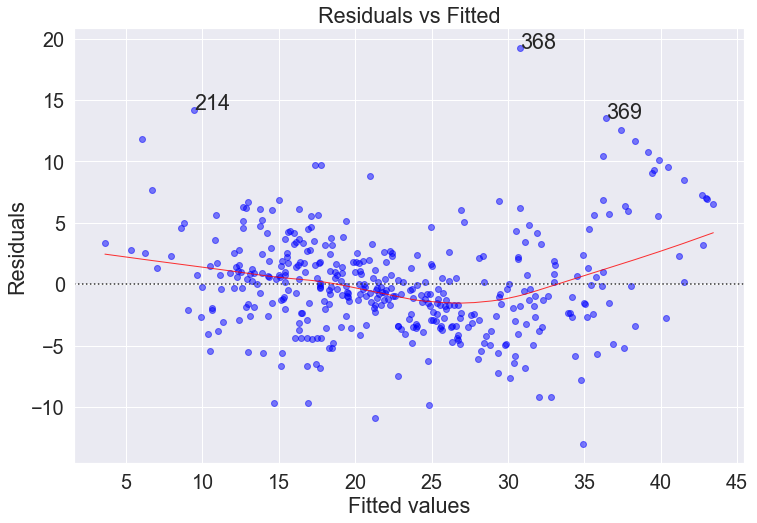

In [70]:
import seaborn as sb
sb.set_style('darkgrid')
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sb.residplot(model_fitted_y, 'MEDV', data=pd.DataFrame({"MEDV":y_train}), 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

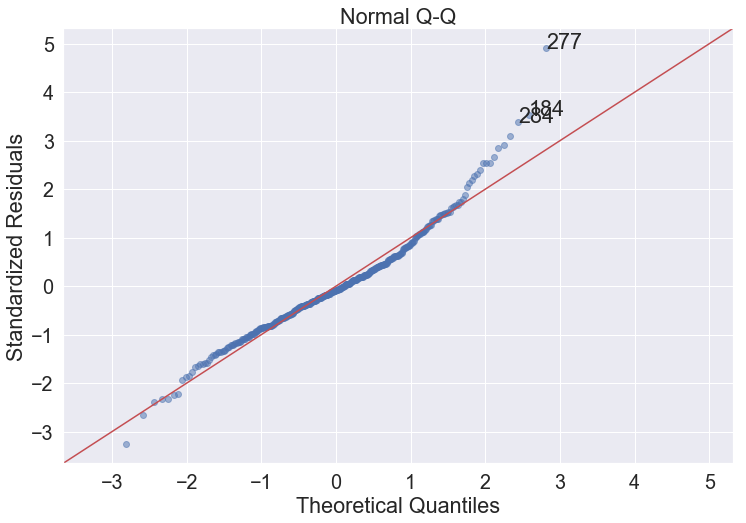

In [71]:
from statsmodels.graphics.gofplots import ProbPlot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

# xy: location of a point
# specify locations of points from the largest to smallest 
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

In [72]:
# Hypothesis testing
perform_shapiro_test(data = model_norm_residuals, alpha_threshold = 0.05)

Sample does not look Gaussian (reject H0).
Test statistic is 0.968.
The corresponding p-value is 0.0.


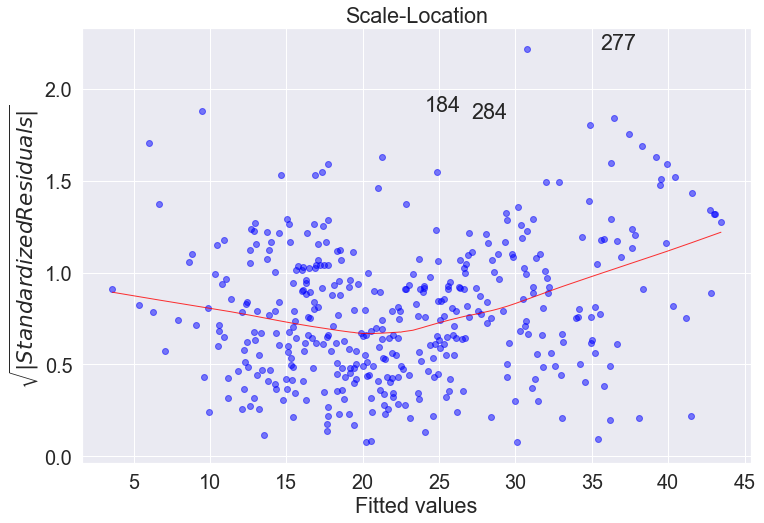

In [73]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5, color = 'blue')
sb.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

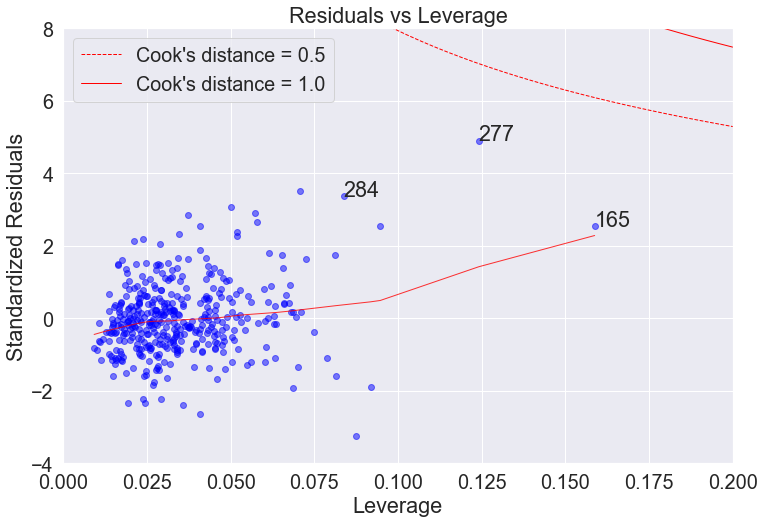

In [74]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5, color = 'blue')
sb.regplot(model_leverage, model_norm_residuals, 
           scatter=False, 
           ci=False, 
           lowess=True,
           line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-4, 8)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, plot_line=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=plot_line, color='red')

p = len(model_1.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      "Cook's distance = 0.5", plot_line ='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50),
      "Cook's distance = 1.0", plot_line ='-') # 1 line

plt.legend(loc='upper left')

In [75]:
# The maximum cook distance
max(model_cooks)

0.24356859056231162

Text(0.5, 1.0, 'Row number VS Residuals')

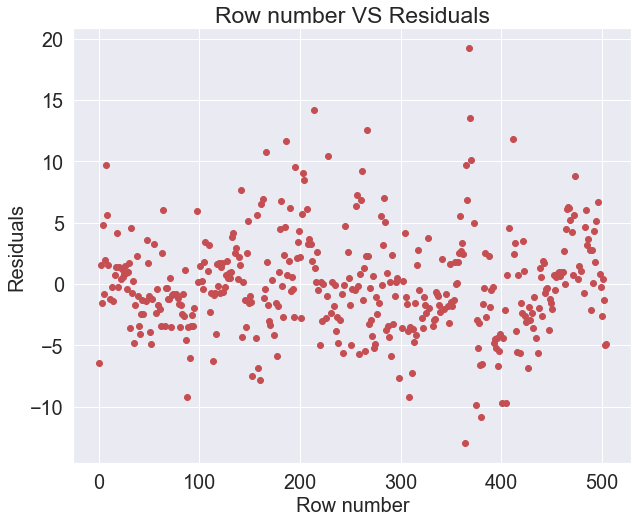

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(x_train.index, model_residuals, c = 'r')
plt.xlabel('Row number', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)
plt.title('Row number VS Residuals', fontsize = 23)

- Reference: https://en.wikipedia.org/wiki/Durbin–Watson_statistic
- Reference: https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html

#### General rule
- This statistic will always be between 0 and 4.
- The test statistic equals 2, indicating no serial correlation.
- The closer to 0 the statistic, the more evidence for positive serial correlation. 
- The closer to 4, the more evidence for negative serial correlation.

In [77]:
# Compute Durbin–Watson statistic to check the auto-correlation 
from statsmodels.stats.stattools import durbin_watson

# There is no serial correlation between residuals
durbin_watson(resids = model_residuals, axis=0)

2.0548552432095684

## 7.5 Coefficient Report - Model 2
- To see how each independent variable contribute to the median value of owner-occupied homes, we change each independent variable by increment 1 and then compute the difference.

$$ y_{pred(MEDV)} = 22.49 + 0.78(CRIM) + 0.14(ZN) + (-0.82)(INDUS) + 
0.59(CHAS) + (-1.57)(NOX) + 1.74RM + 
0.51(AGE) + (-2.89)(DIS) + 0.53(RAD) +
(-1.53)(TAX) + (-1.68)(PTRATIO) + 0.37(B) + (-5.62)(LSTAT) $$

In [78]:
# Coefficients for independent variables
model_2.params

const      22.488725
CRIM        0.777058
ZN          0.135042
INDUS      -0.819556
CHAS        0.594540
NOX        -1.571147
RM          1.743394
AGE         0.512581
DIS        -2.886062
RAD         0.528208
TAX        -1.534678
PTRATIO    -1.684525
B           0.373808
LSTAT      -5.618286
dtype: float64

In [79]:
# Find lambdas
all_data = df.copy()
box_cox_lambda_ls = []

# Get rid of the lambda of the MEDV
for col in all_data.columns[:-1]:
    if np.min(all_data[col].values) <= 0:
        box_cox_lambda = boxcox(all_data[col].values + 1)[1]
    else:
        box_cox_lambda = boxcox(all_data[col].values)[1]
    box_cox_lambda_ls.append(box_cox_lambda)
box_cox_lambda_ls

[-0.11353461217235866,
 -0.9052980145315767,
 0.43208985735334443,
 -20.85708984968496,
 -0.9156121057973192,
 0.44895976107977725,
 1.3414473152167279,
 -0.1556058423249141,
 -0.14140887265001617,
 -0.5255084713560311,
 4.3502156388191,
 3.6636731599974253,
 0.22776736744327938]

In [80]:
# Helper function for redoing the process for each independent variable
def coefficent_report(coeffs, box_cox_lambdas, x):
    prediction = 0
    # Started from index 1 to ignore the constant (beta 0)
    for coef, lambda_value, x in zip(coeffs[1:], box_cox_lambdas, x[1:]):
        box_cox_transformed_x = ((x**lambda_value) - 1) / lambda_value
        prediction += coef*box_cox_transformed_x
    return prediction

In [81]:
# All values of independent variables are 1
new_test = [1] * 14
coefficent_report(coeffs = model_2.params, box_cox_lambdas = box_cox_lambda_ls,
                  x = new_test)

0.0

In [82]:
# See the contribution for each independent variable
for i in range(0, 15):
    if i < 13:
        # Construct a list containing all 1 elements
        new_test = [1] * 14
        
        # Increment from 1 to 2
        new_test[i+1] = 2
        
        # Calculate the prediction value
        print('{} variable contributes {} unit on the MEDV.'.format(
            model_2.params.index[i+1],
            round(coefficent_report(coeffs = model_2.params, box_cox_lambdas = box_cox_lambda_ls,
                  x = new_test), 4))
             )

CRIM variable contributes 0.518 unit on the MEDV.
ZN variable contributes 0.0695 unit on the MEDV.
INDUS variable contributes -0.6623 unit on the MEDV.
CHAS variable contributes 0.0285 unit on the MEDV.
NOX variable contributes -0.8063 unit on the MEDV.
RM variable contributes 1.4176 unit on the MEDV.
AGE variable contributes 0.5862 unit on the MEDV.
DIS variable contributes -1.8964 unit on the MEDV.
RAD variable contributes 0.3488 unit on the MEDV.
TAX variable contributes -0.8915 unit on the MEDV.
PTRATIO variable contributes -7.5107 unit on the MEDV.
B variable contributes 1.191 unit on the MEDV.
LSTAT variable contributes -4.2185 unit on the MEDV.


In [83]:
# Notice that the changes are not in a linear relationship!
for i in range(0, 15):
    if i < 13:
        # Construct a list containing all 1 elements
        new_test = [1] * 14
        
        # Increment from 1 to 3
        new_test[i+1] = 3
        
        # Calculate the prediction value
        print('{} variable contributes {} unit on the MEDV.'.format(
            model_2.params.index[i+1],
            round(coefficent_report(coeffs = model_2.params, box_cox_lambdas = box_cox_lambda_ls,
                  x = new_test), 4))
             )

CRIM variable contributes 0.8026 unit on the MEDV.
ZN variable contributes 0.094 unit on the MEDV.
INDUS variable contributes -1.1523 unit on the MEDV.
CHAS variable contributes 0.0285 unit on the MEDV.
NOX variable contributes -1.0884 unit on the MEDV.
RM variable contributes 2.4759 unit on the MEDV.
AGE variable contributes 1.286 unit on the MEDV.
DIS variable contributes -2.9145 unit on the MEDV.
RAD variable contributes 0.5375 unit on the MEDV.
TAX variable contributes -1.2809 unit on the MEDV.
PTRATIO variable contributes -45.6964 unit on the MEDV.
B variable contributes 5.6094 unit on the MEDV.
LSTAT variable contributes -7.0132 unit on the MEDV.


# 8. Summary
#### 1. Using 2nd improvement method achieved the best results both on adjusted R-squared and MSE metrics. Model 2 has the least difference between the train and test metric, but still indicating an overfitting issue. 
#### 2. In the next notebook, I will address the overfitting issue in the multiple linear regression models. Regularized linear regression models can solve multicollinearity and overfitting issue simultaneously.
#### 3. Notice that using box-cox transformation on independent variables could improve the result, but we will lose the original linear relationship between the independent variable and dependent variable. In the 7.5 Coefficient Report - Model 2, even though we lost the linear relationship, we can know "the direction" which can be a positive or negative impact on the MEDV variable. Such as, originally, INDUS, NOX, DIS, TAX, PTRATIO, and LSTAT have negative effects on the MEDV variable. After the box-cox transformation, this attribute still hold.